<a href="https://colab.research.google.com/github/bryanco03/Proyecto1_parte2/blob/main/proyecto1_parte2_se_ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graficacion de electrocardiogramas y la obtencion de la frecuencia cardiaca**
En el siguiente notebook, se va a gráficas electrocardiogramas, a partir de señales de sonido del corazón, posterior se realiza un análisis a los gráficos obtenidos para poder estimar la frecuencia cardiaca, esto utilizando el lenguaje de programación Python


Para comenzar el notebook se importan librerias como numpy, matplotlib, scipy entre otras para realizar graficos y otras operaciones para poder pasar la señal de sonido a datos los cuales se pueda realizar un grafico.

In [ ]:
# Importar librerias
import numpy as np
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import butter, lfilter, filtfilt # Para filtrado de data
from statistics import stdev
sys.path.insert(1, r'./../functions') # add to pythonpath


Se define las siguientes funciones:
* **ecg(variable)**: Esta función recibe un archivo .wav, y devuelve dos arrays con la información uno que contiene los datos de la señal de audio y otro que representa el tiempo asociado a cada muestra de la señal

* **detecta_máximos _locales(timeECG, waveData, threshold)**: Esta función encuentra los índices de los máximos locales en una señal de datos de onda, en este caso, detecta los picos R de un electrocardiograma, los cuales van a ser útiles para calcular la frecuencia cardiaca.





In [ ]:
def ecg(variable):
    record = wave.open(variable, 'r') # carga la informacion

    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() #number of channels
    numFrames = record.getnframes() #number of frames
    sampleRate = record.getframerate() #sampling rate
    sampleWidth = record.getsampwidth()

    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Get time window
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))

    return timeECG, waveData

def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")

    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False

    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False

    return mxs_indices

# Graficación

Se empieza a graficar cada una de las quince sonidos de latidos del corazón seleccionadas utilizando la funcion **ecg(variable)**.

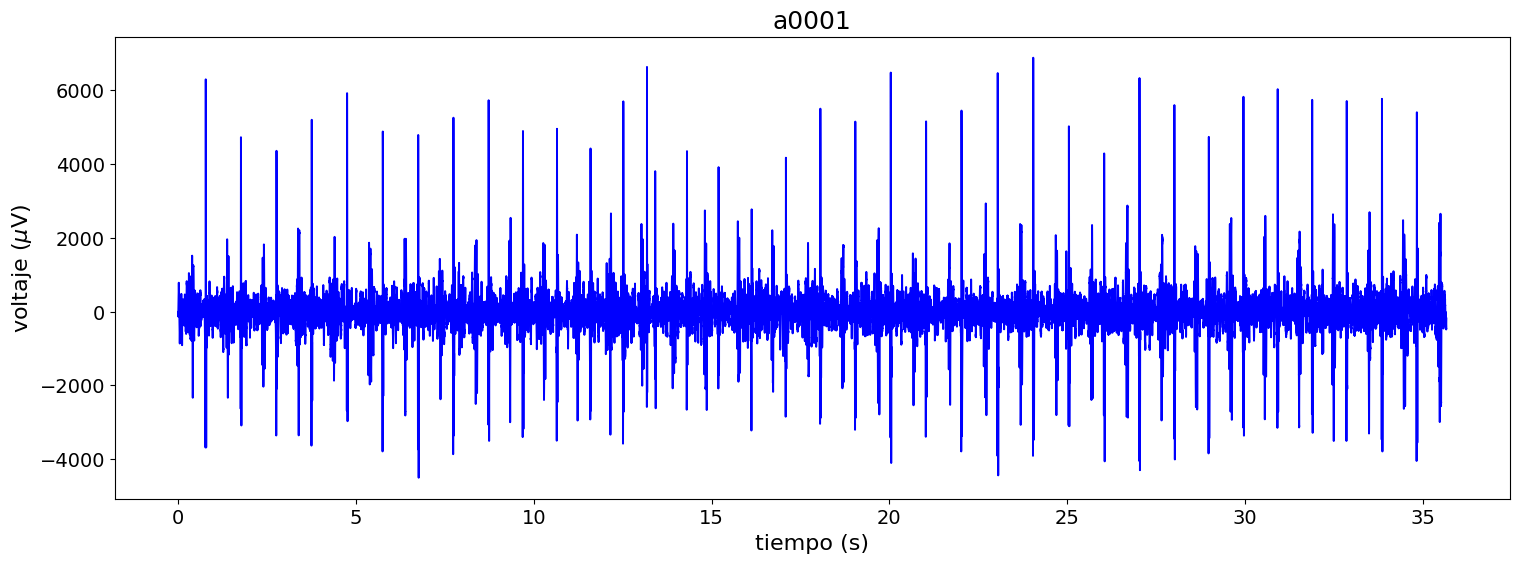

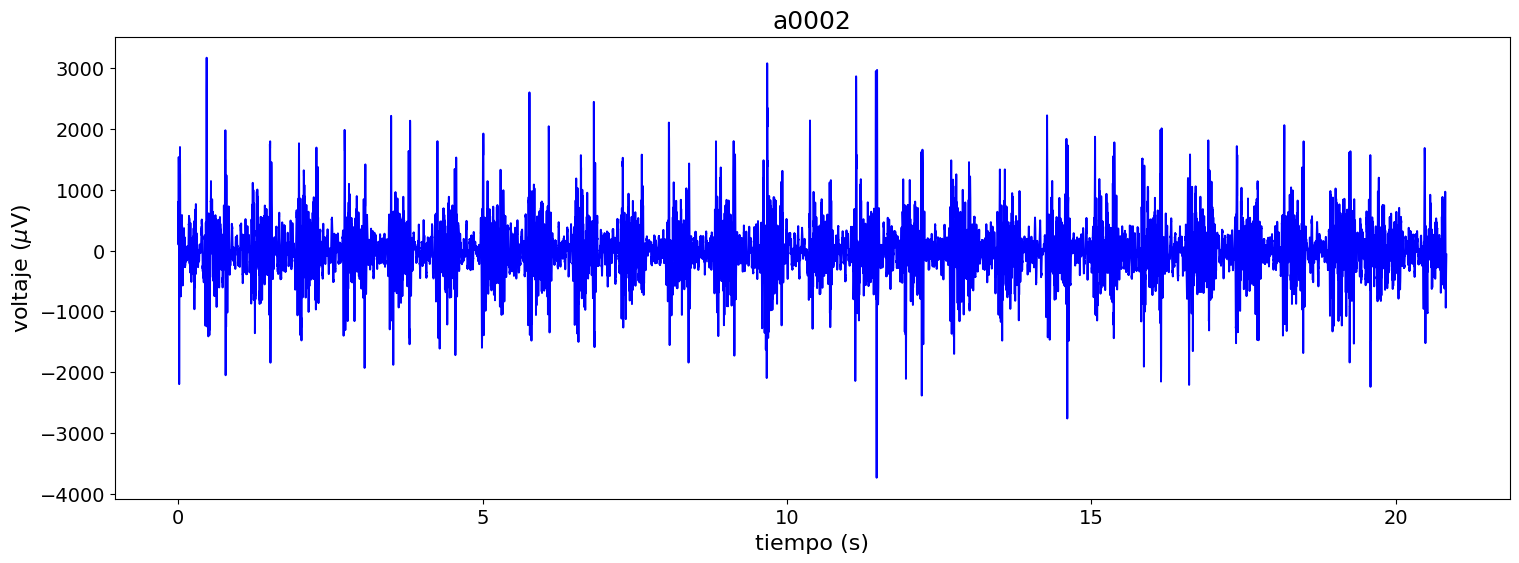

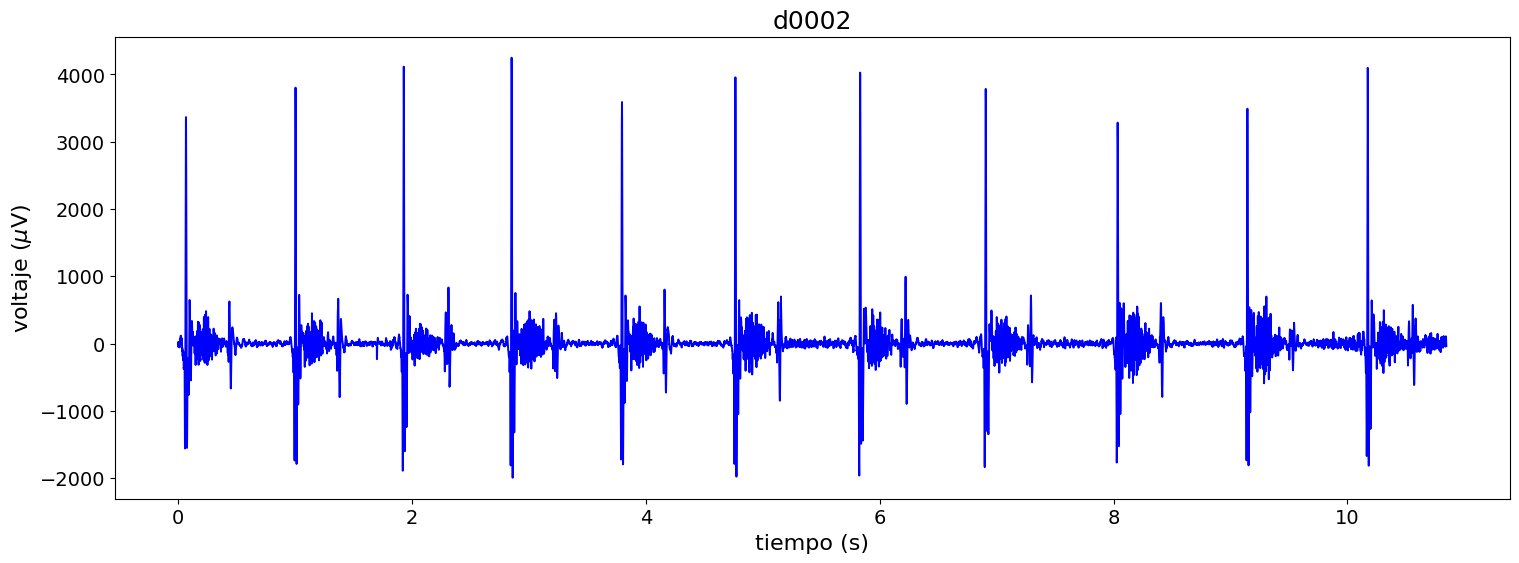

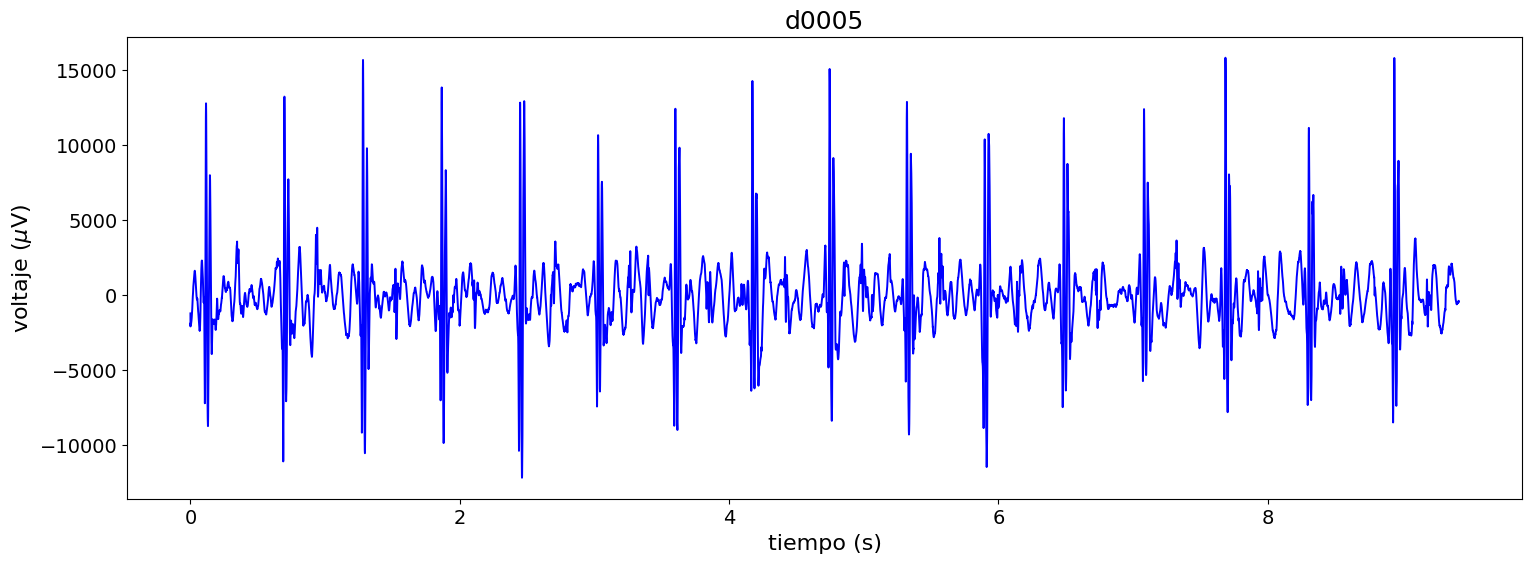

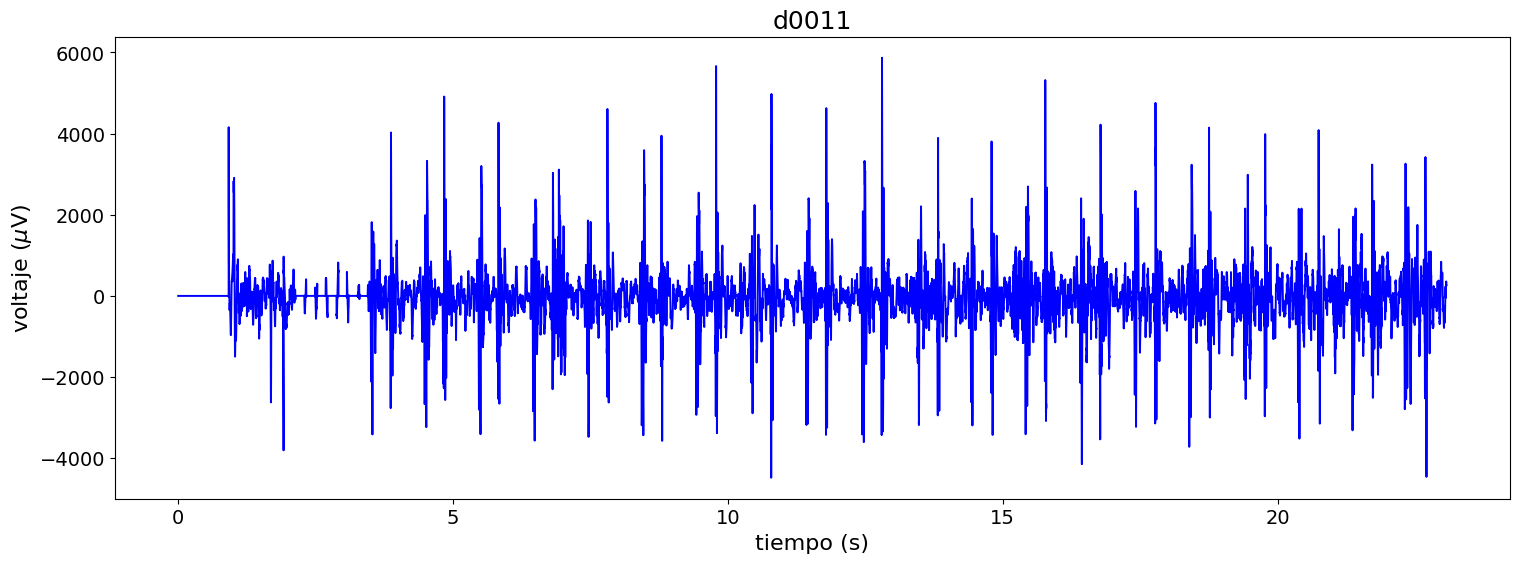

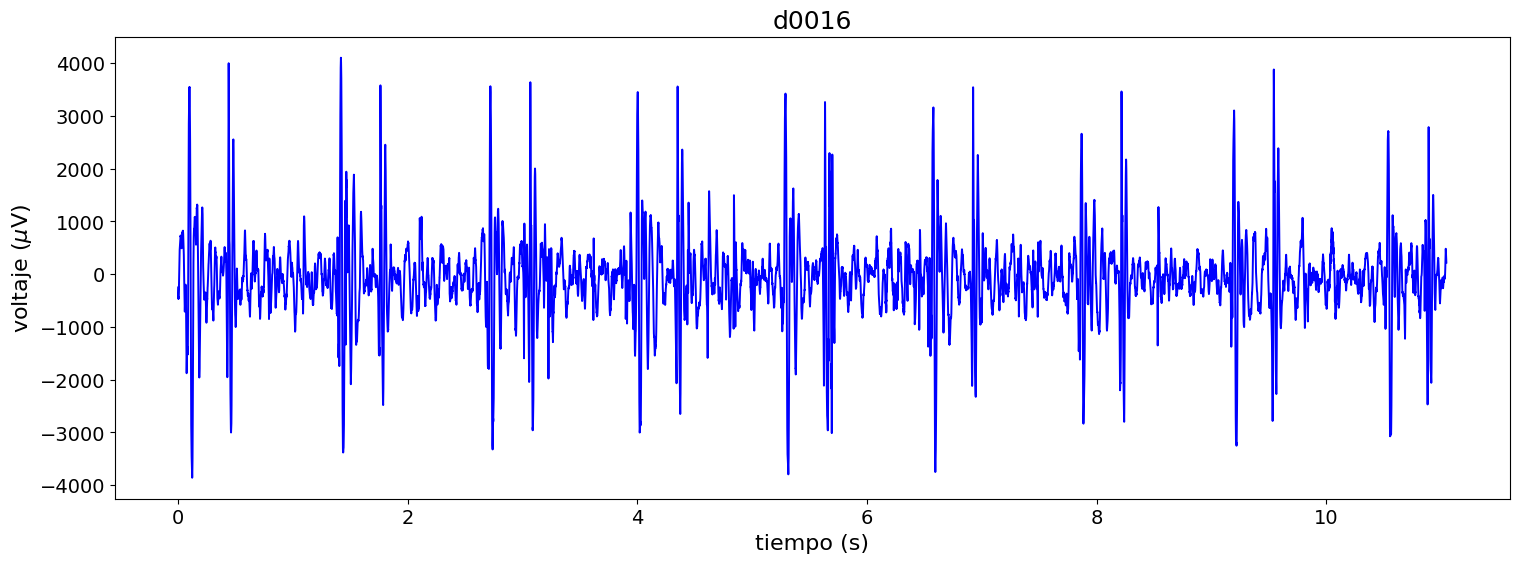

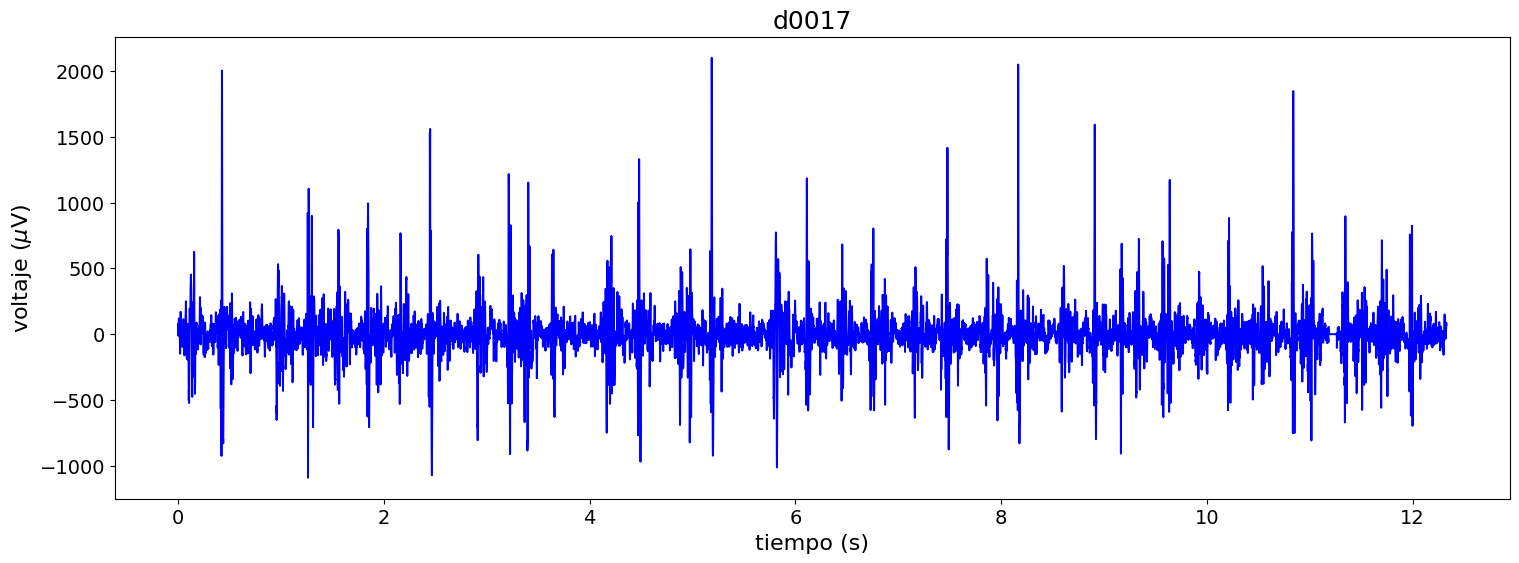

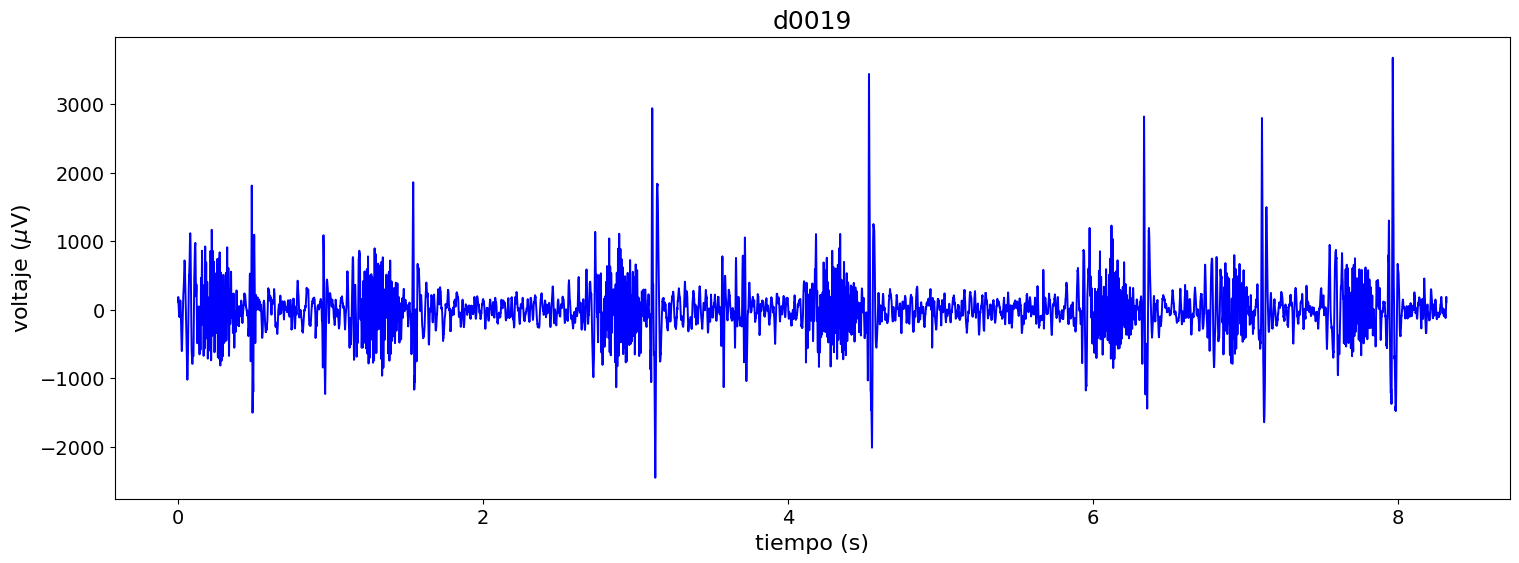

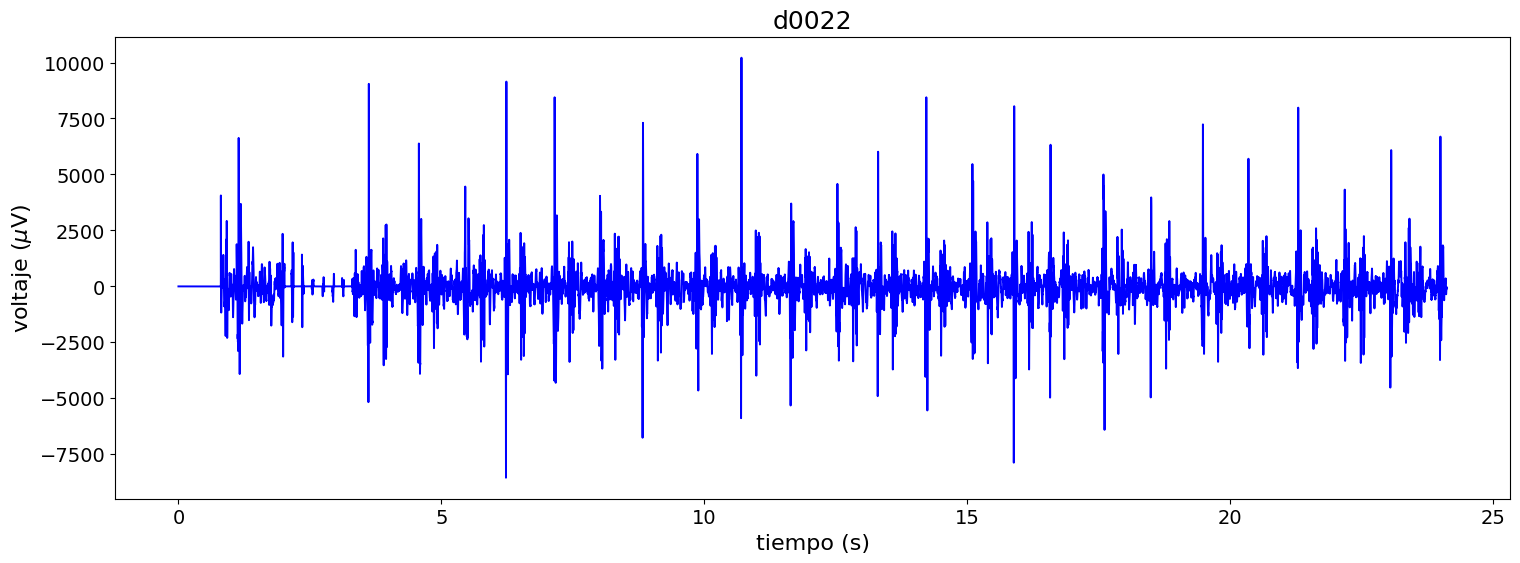

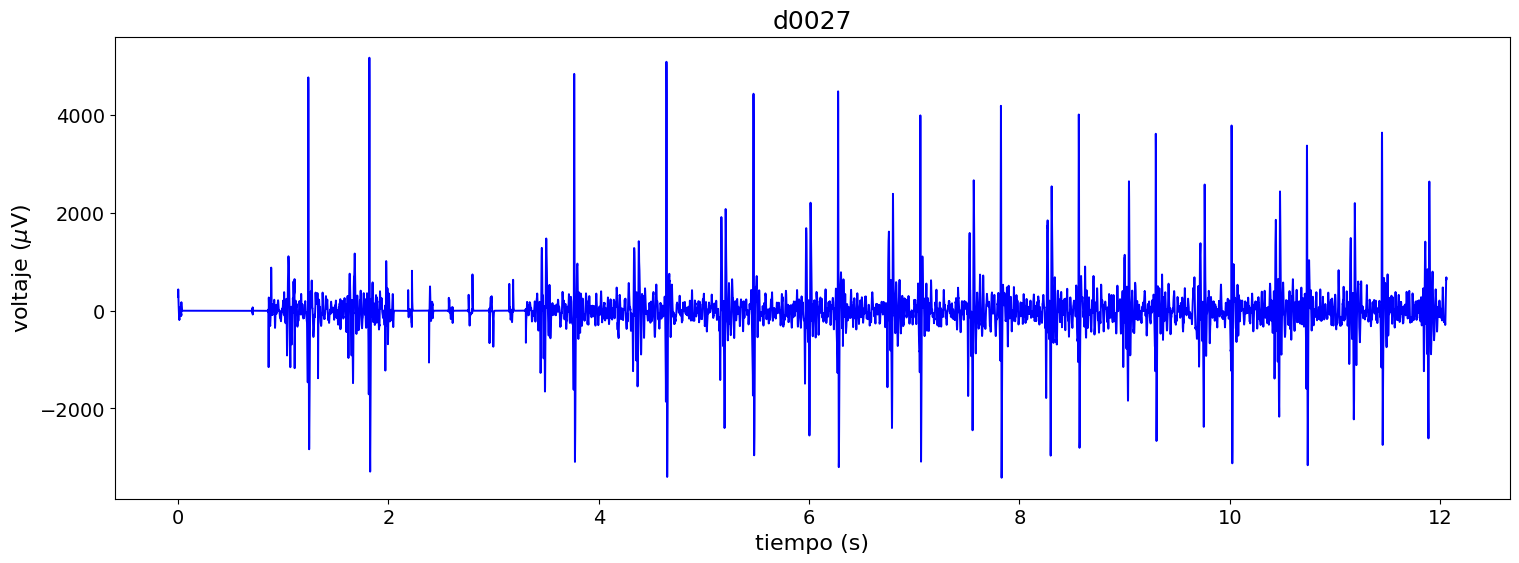

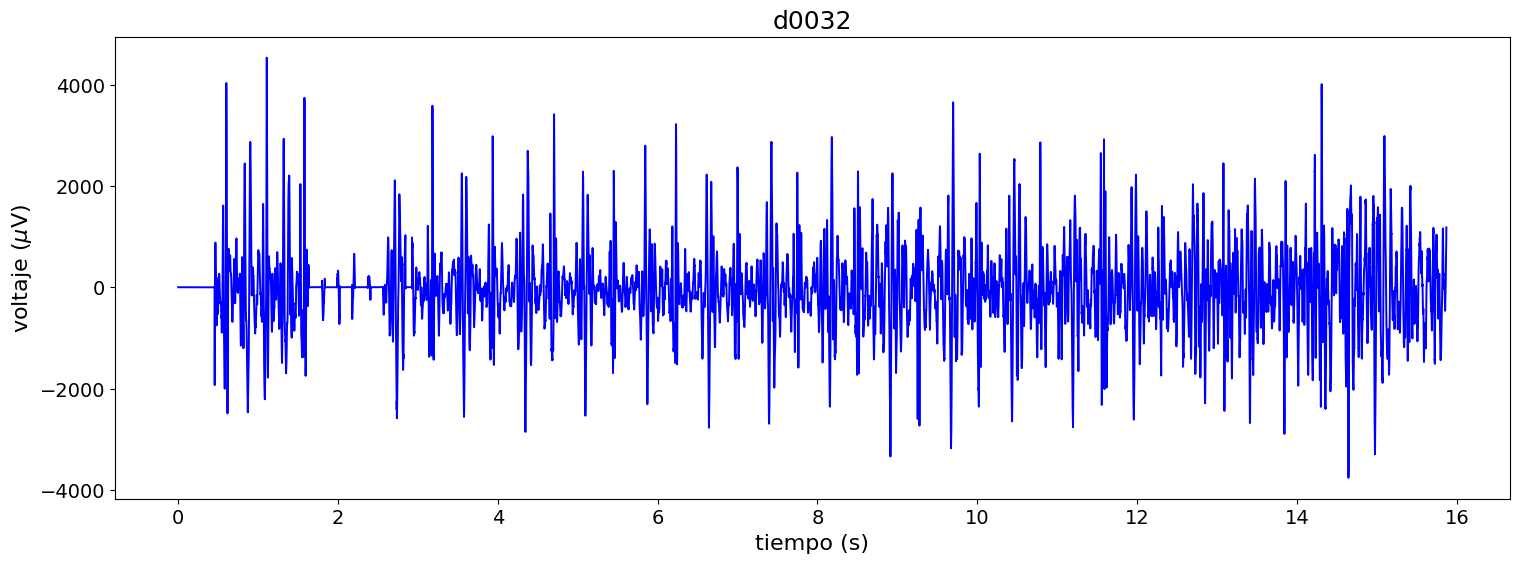

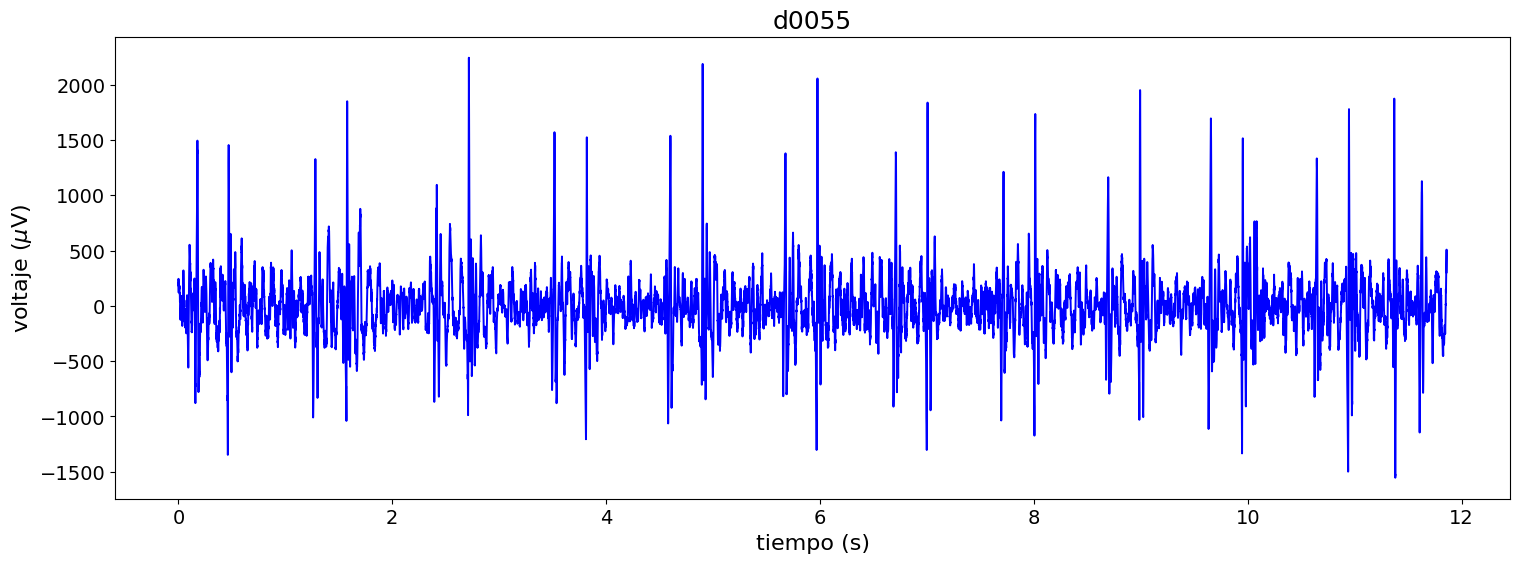

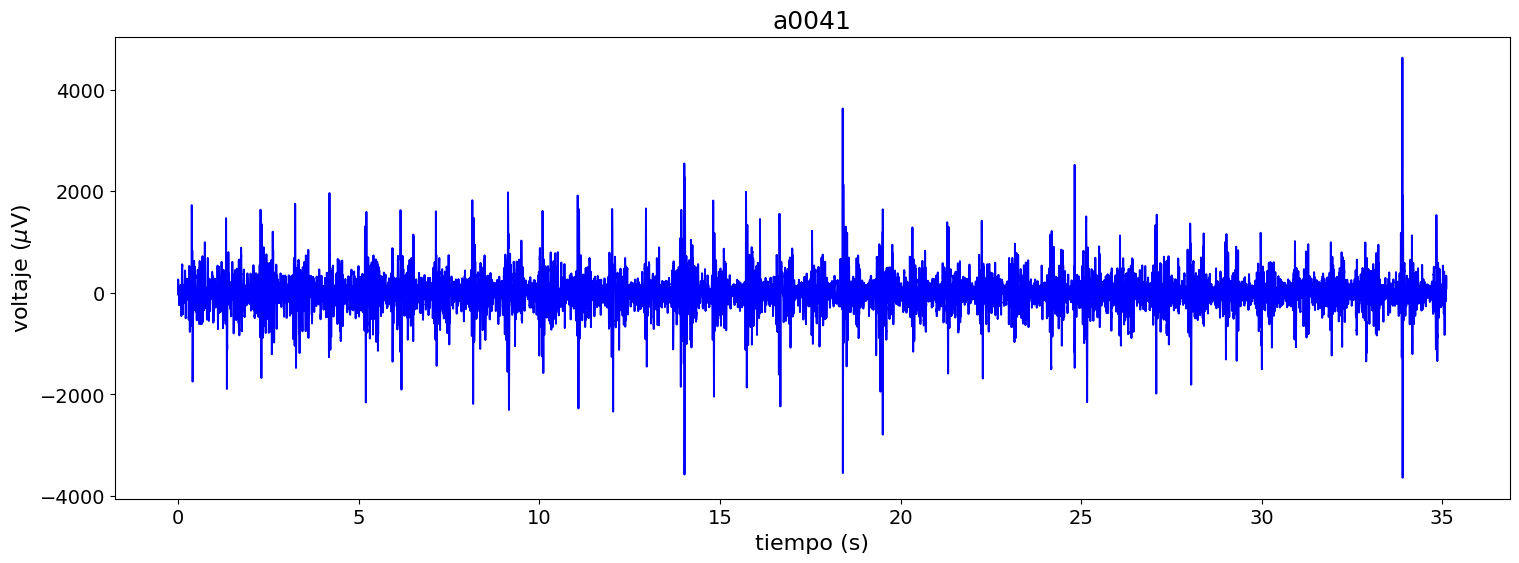

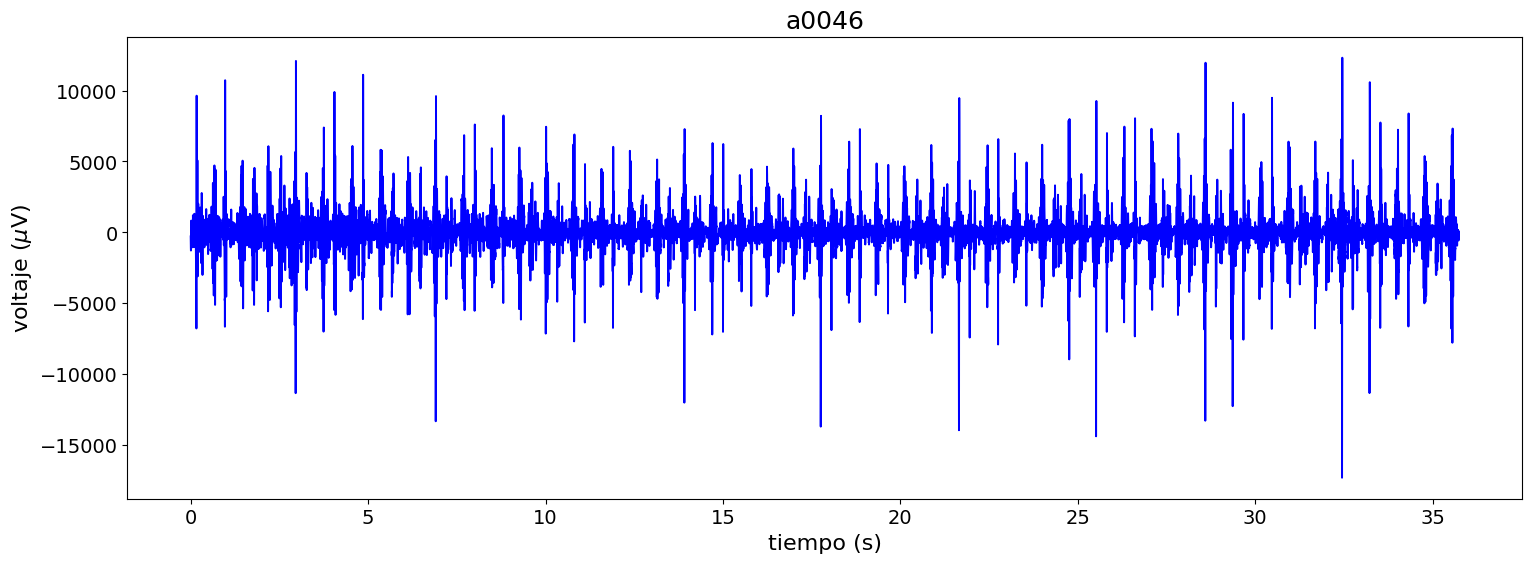

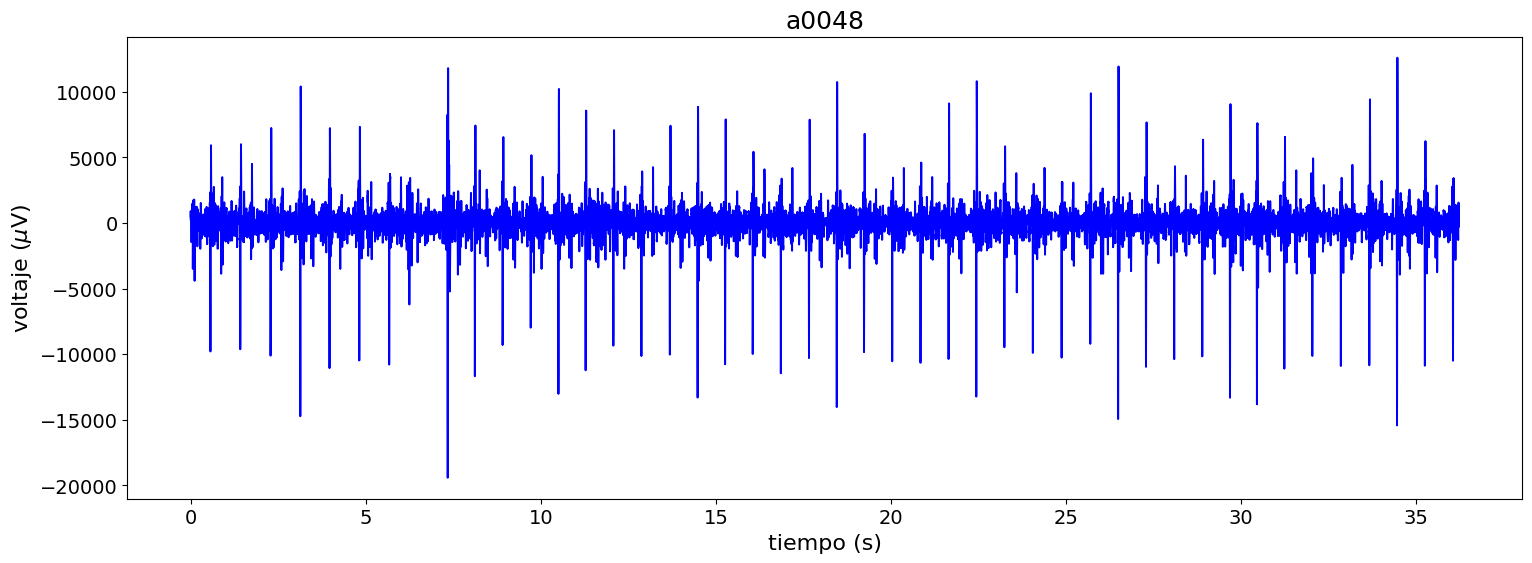

In [ ]:
#Parametros para los gráficos
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

# Sonidos de latidos de corazon
nice = ["a0001","a0002","d0002","d0005","d0011","d0016","d0017","d0019","d0022","d0027","d0032","d0055","a0041","a0046","a0048"]
# Graficar las 15 señales
for i in range(0, len(nice)):
    timeECG, waveData = ecg(nice[i]+'.wav')
       #Plotting EMG signal
    plt.figure(figsize=(18,6))
    plt.xlabel(r'tiempo (s)')
    plt.ylabel(r'voltaje ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.title(nice[i])
    plt.show()

# Detección de pico máximos

A los gráficos anteriores se les aplicó la función **detecta_maximos_locales** la cual detecta los picos R de los latidos los cuales van a ser útiles para la obtención de la frecuencia cardiaca.

**NOTA**: Se hicieron cambios respecto a los sonidos elegidos en la primera parte del proyecto debido a que esta función no detectaba correctamente los picos R, para la función funcione correctamente, la gráfica debe tener lo siguiente[1]:


* Línea base estable.
* Los picos R deben ser más altos que el valor máximo de la onda T.
* Los picos R tienen la misma amplitud en cada ciclo.




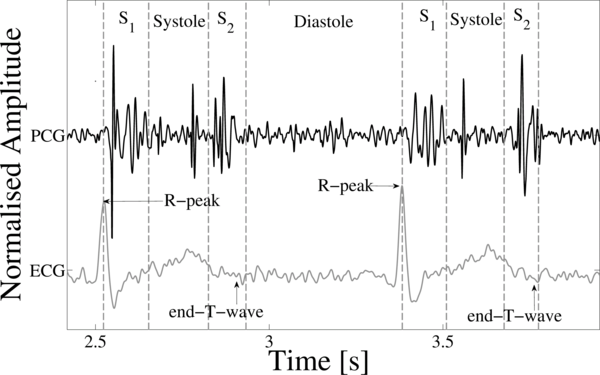

Figura 1: Ejemplo de un EGC [1]



Debido a que varias de las señales elegidas inicialmente no contaban con lo anteriormente mencionado, los resultados de la frecuencia cardiaca no eran los más fiables, por lo cual se decidió cambiar los sonidos



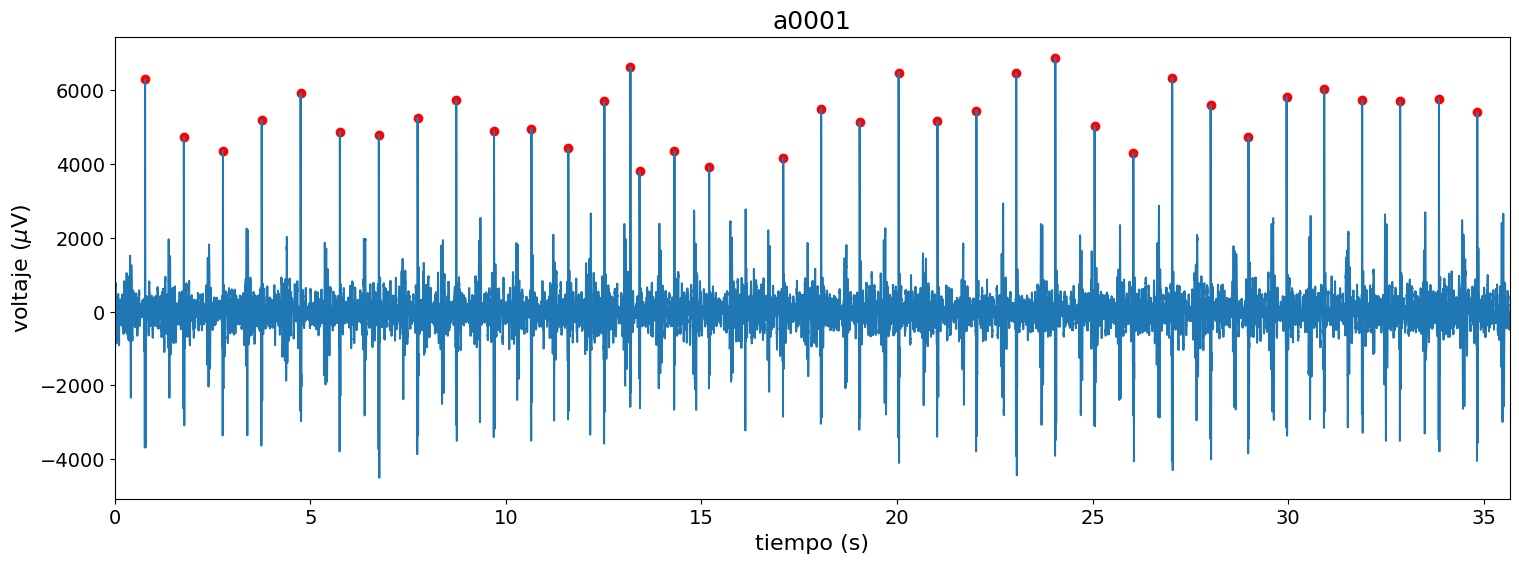

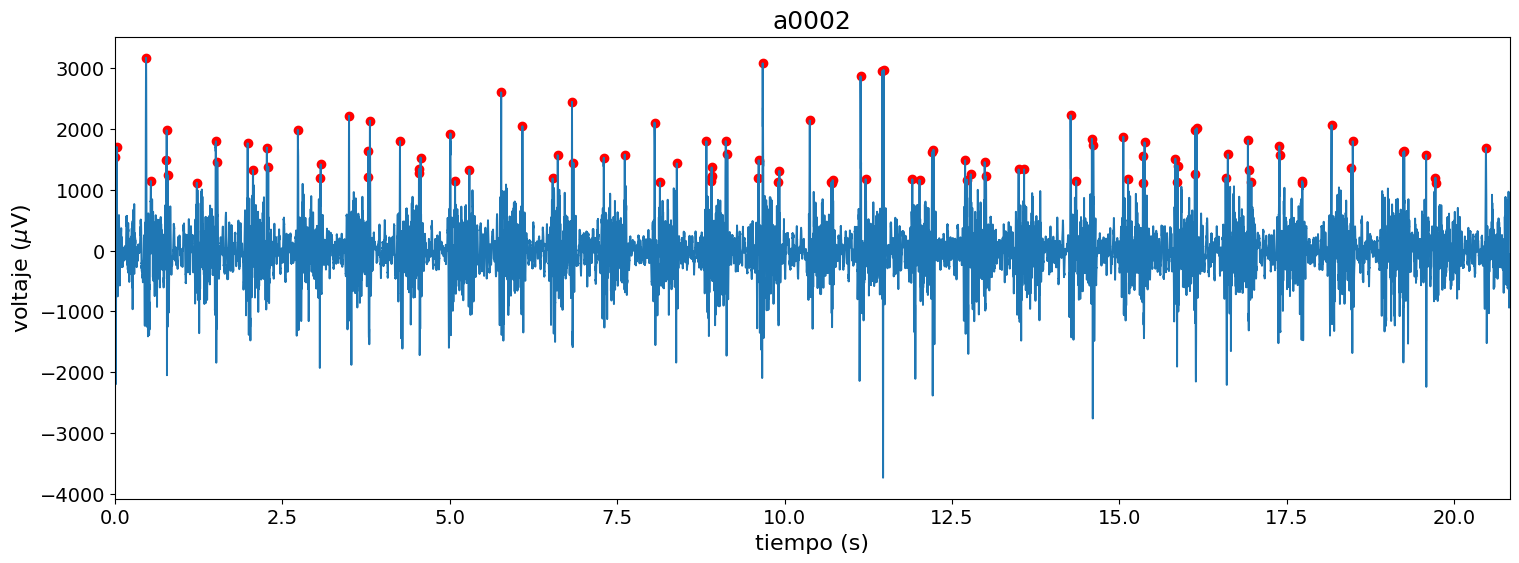

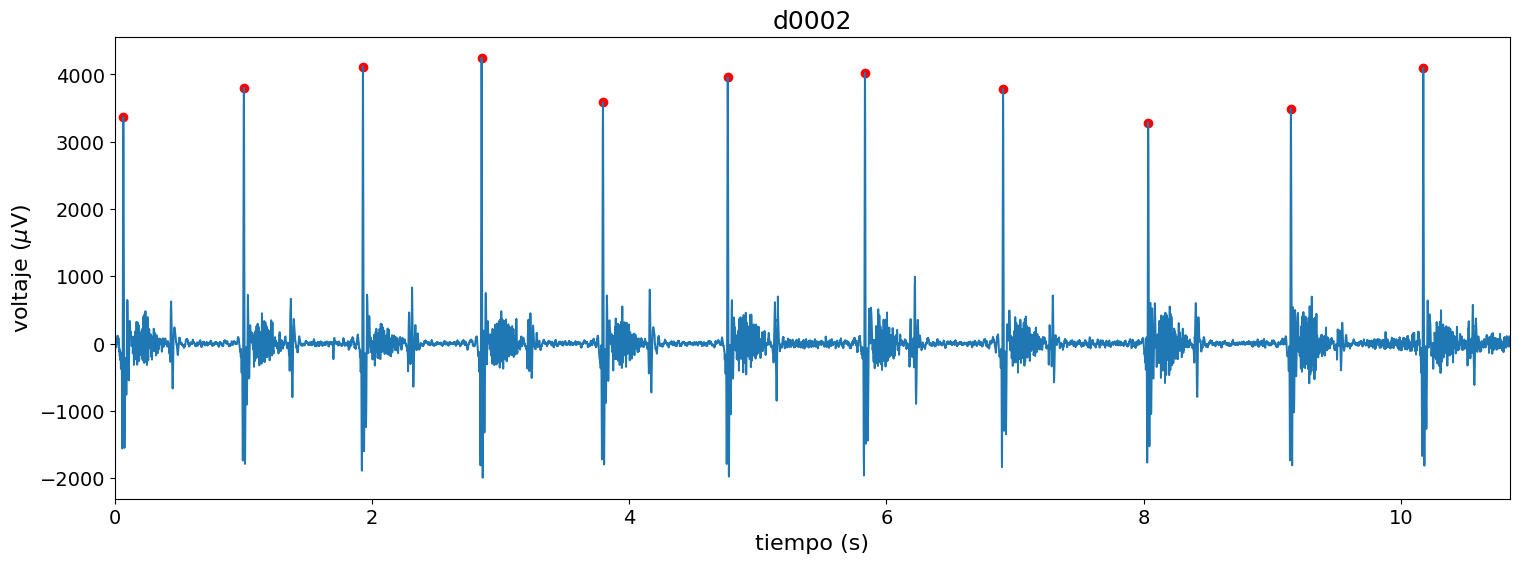

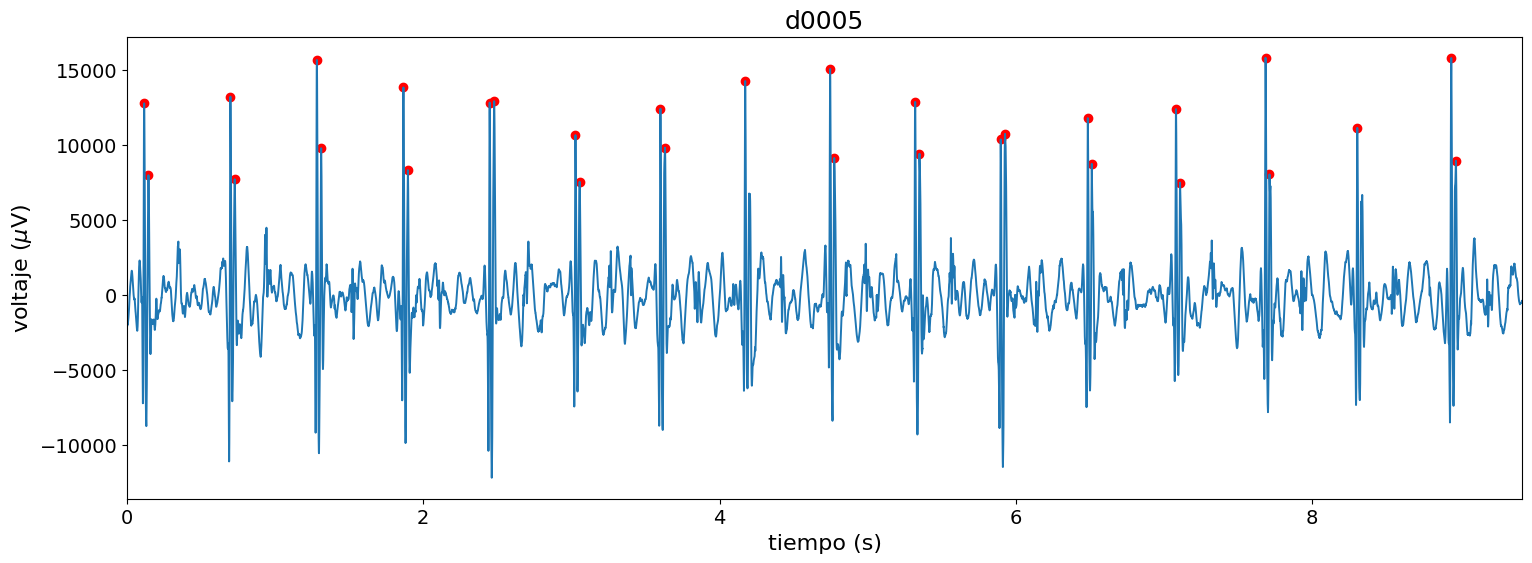

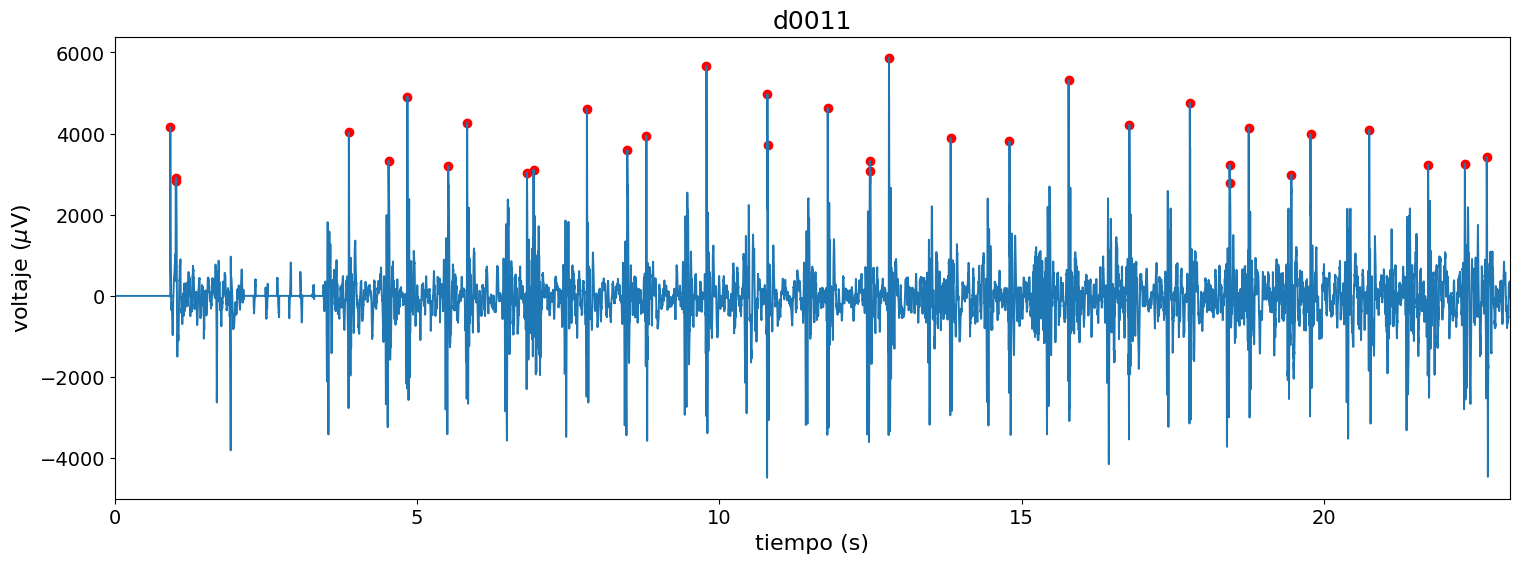

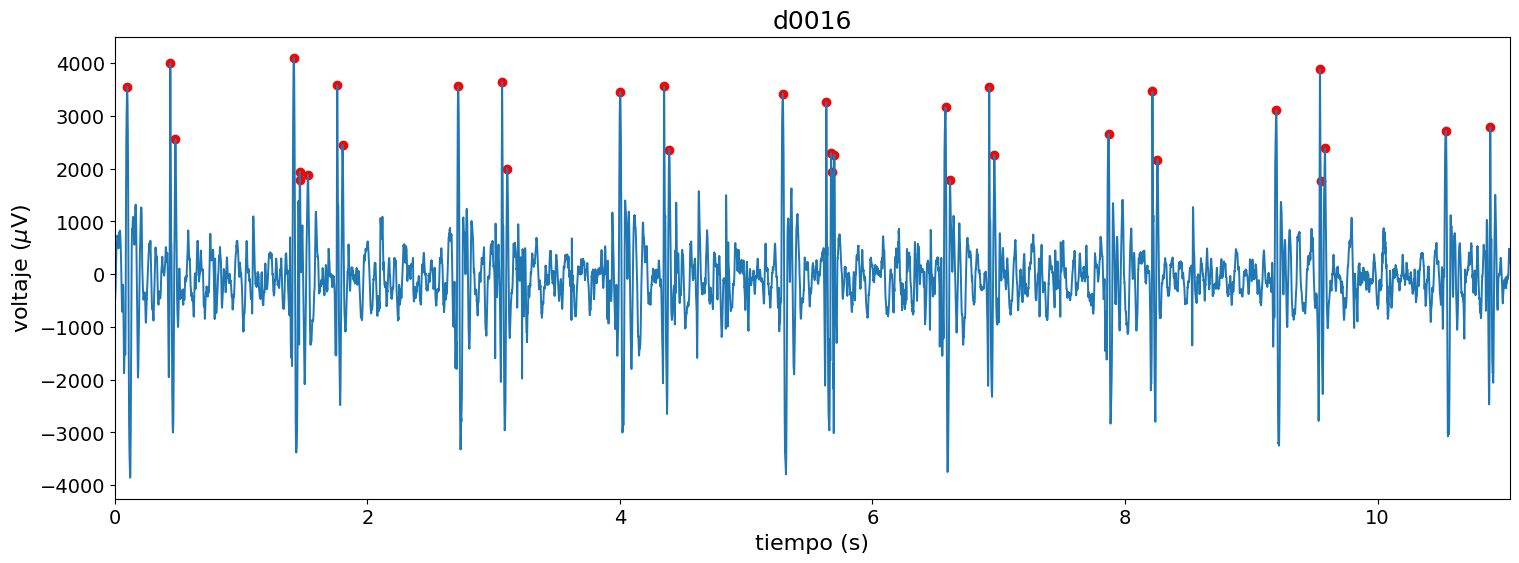

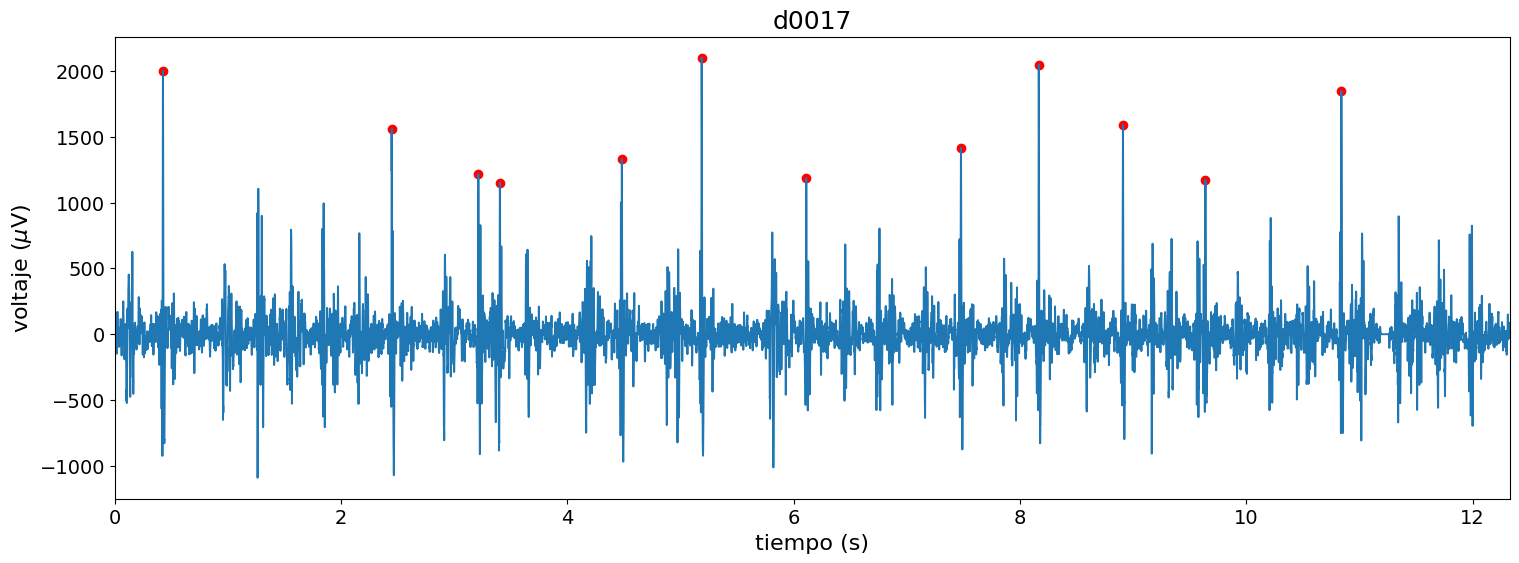

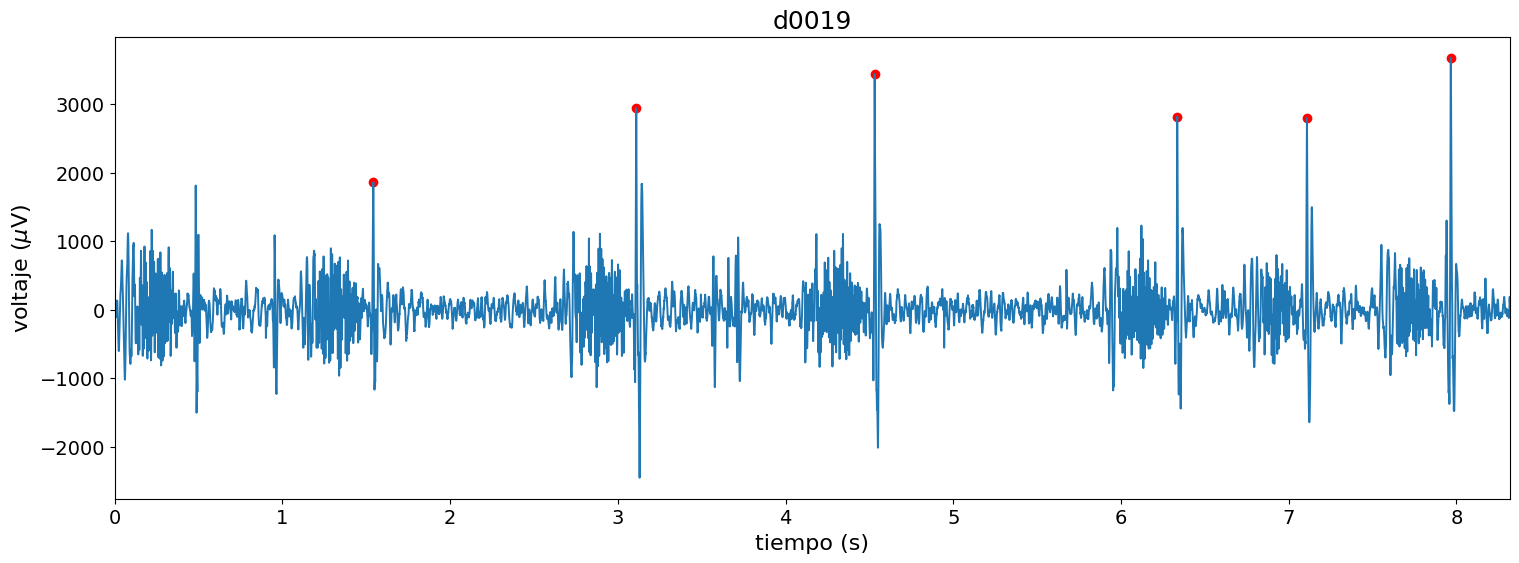

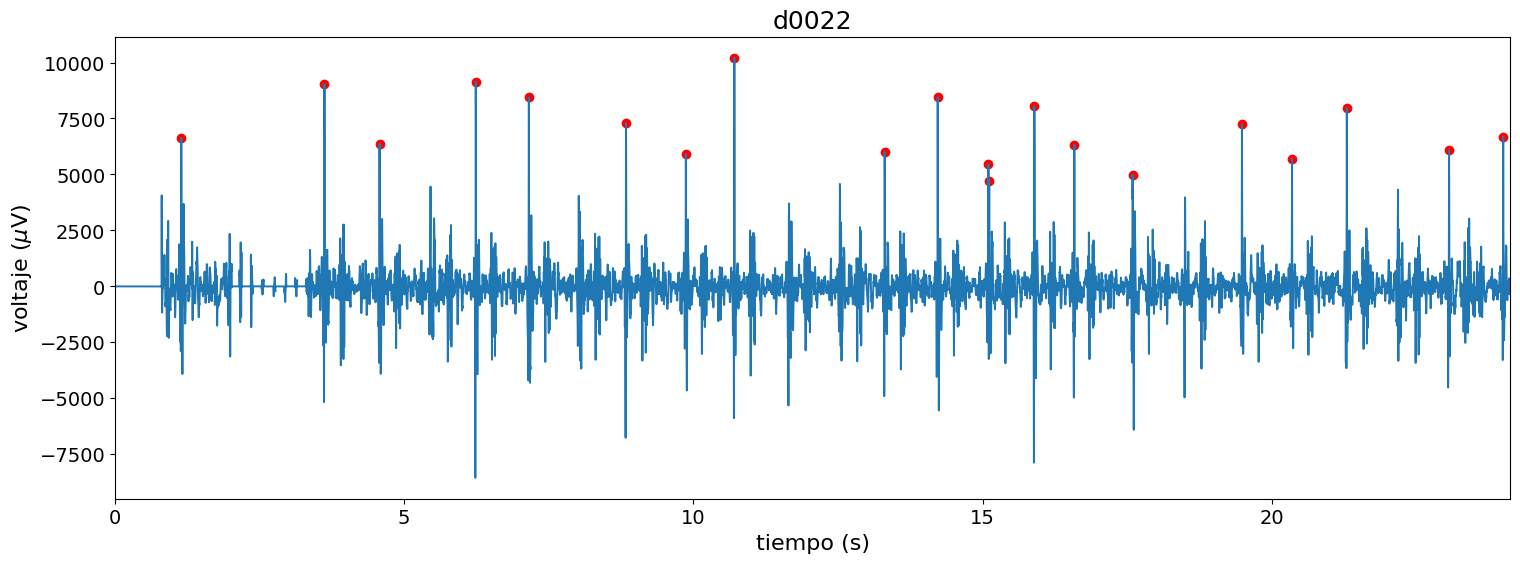

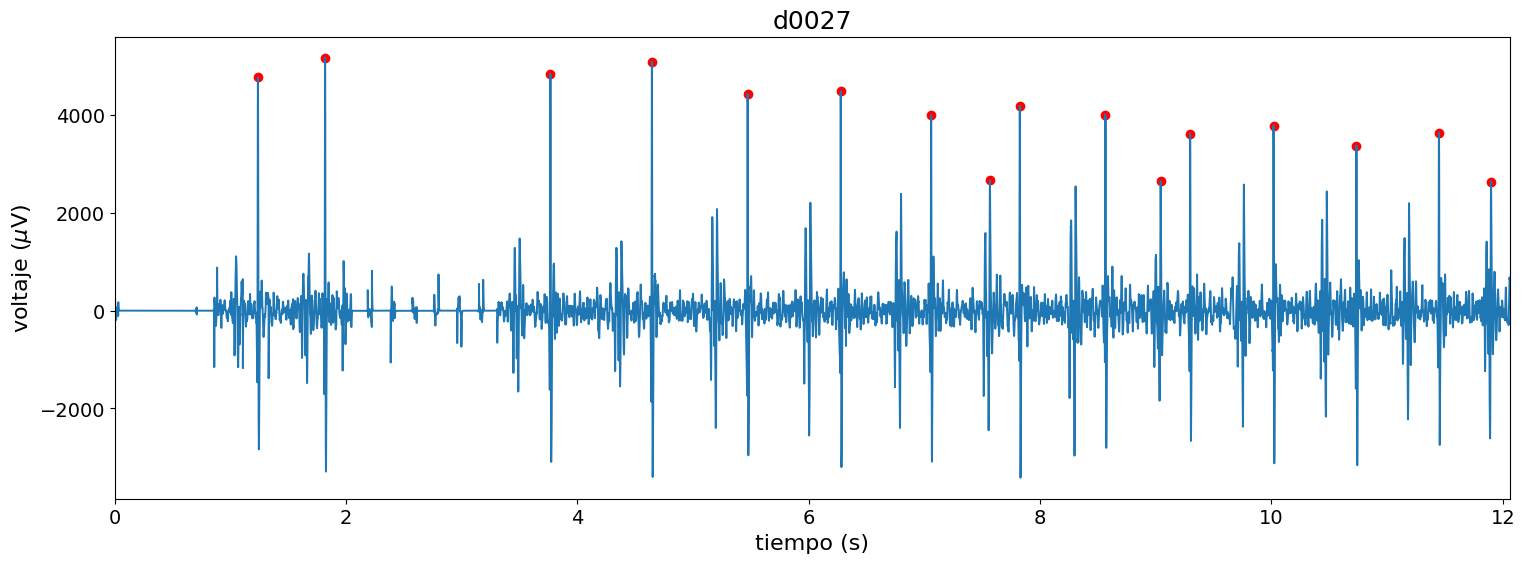

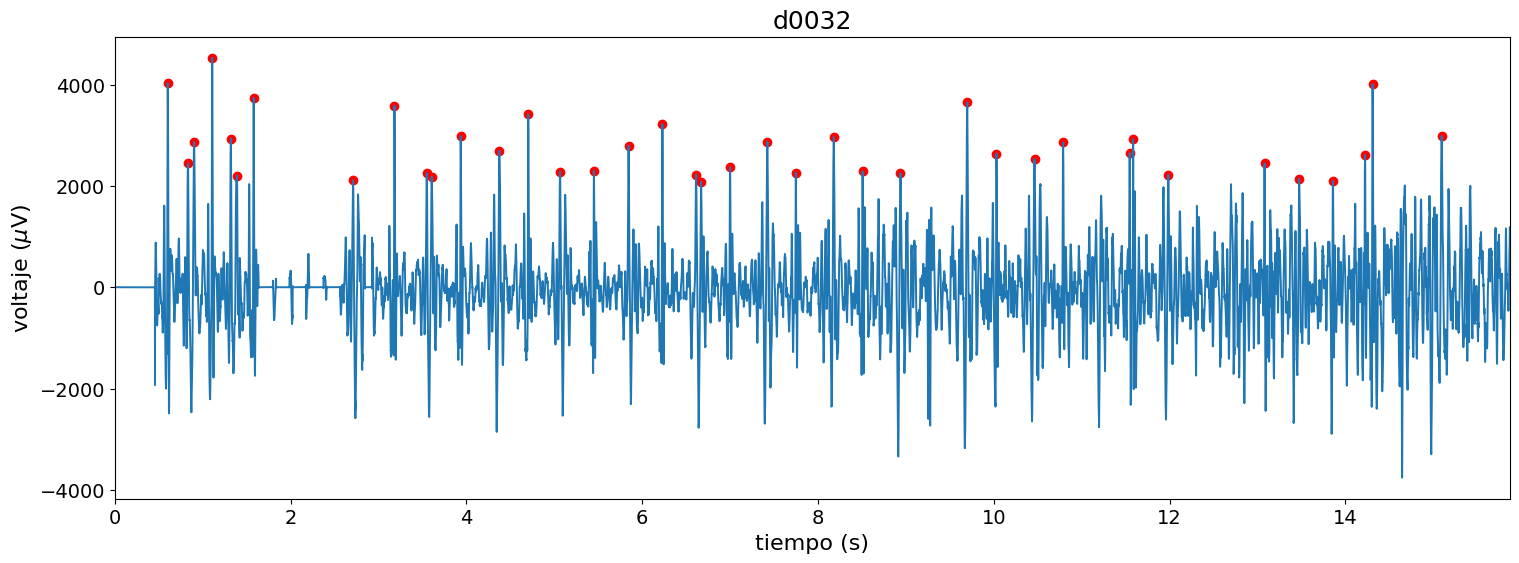

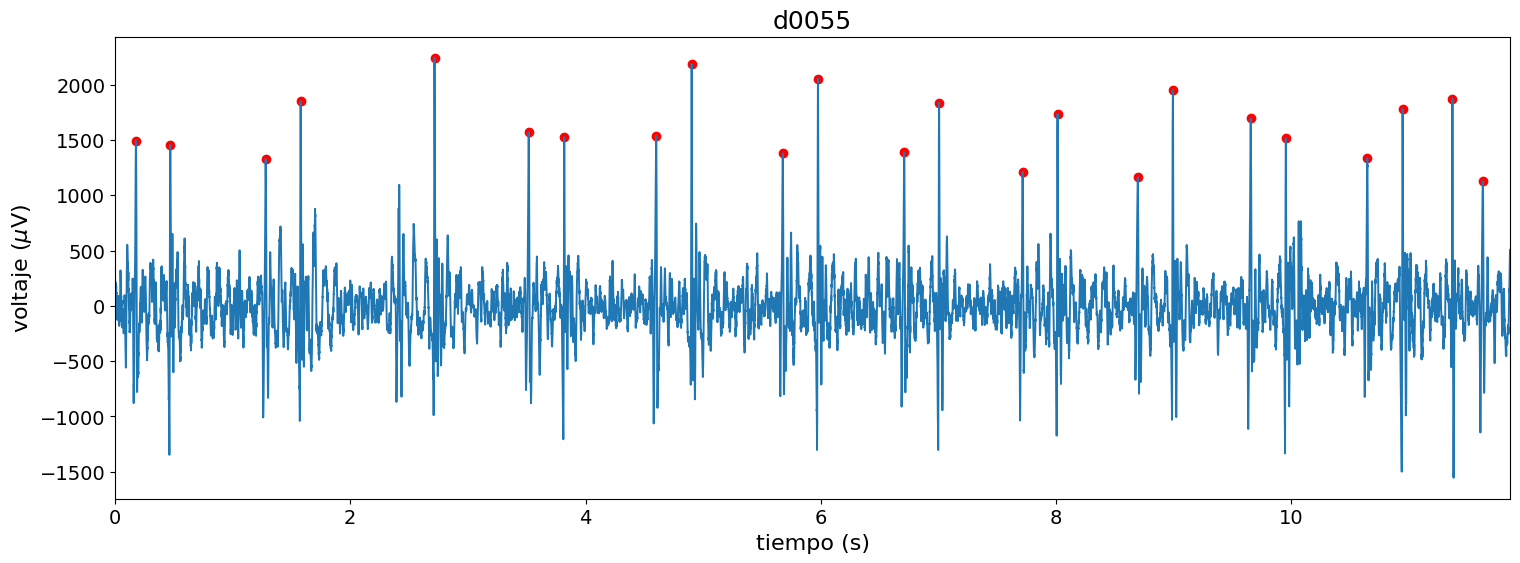

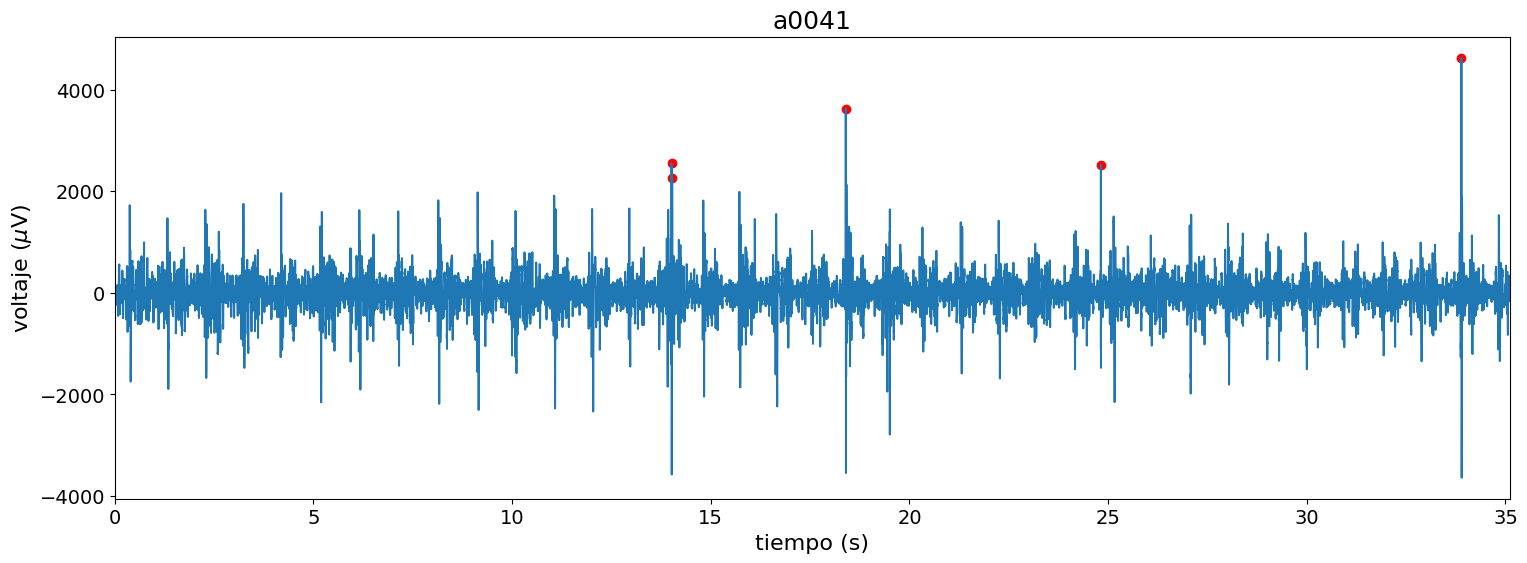

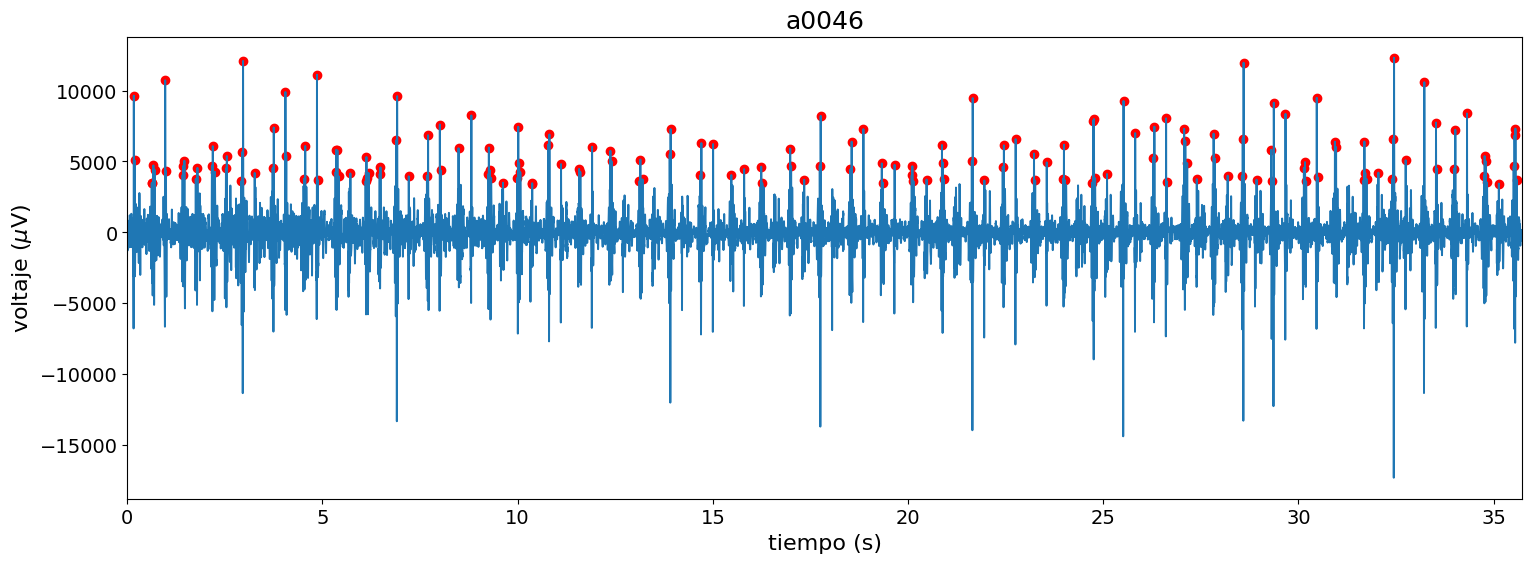

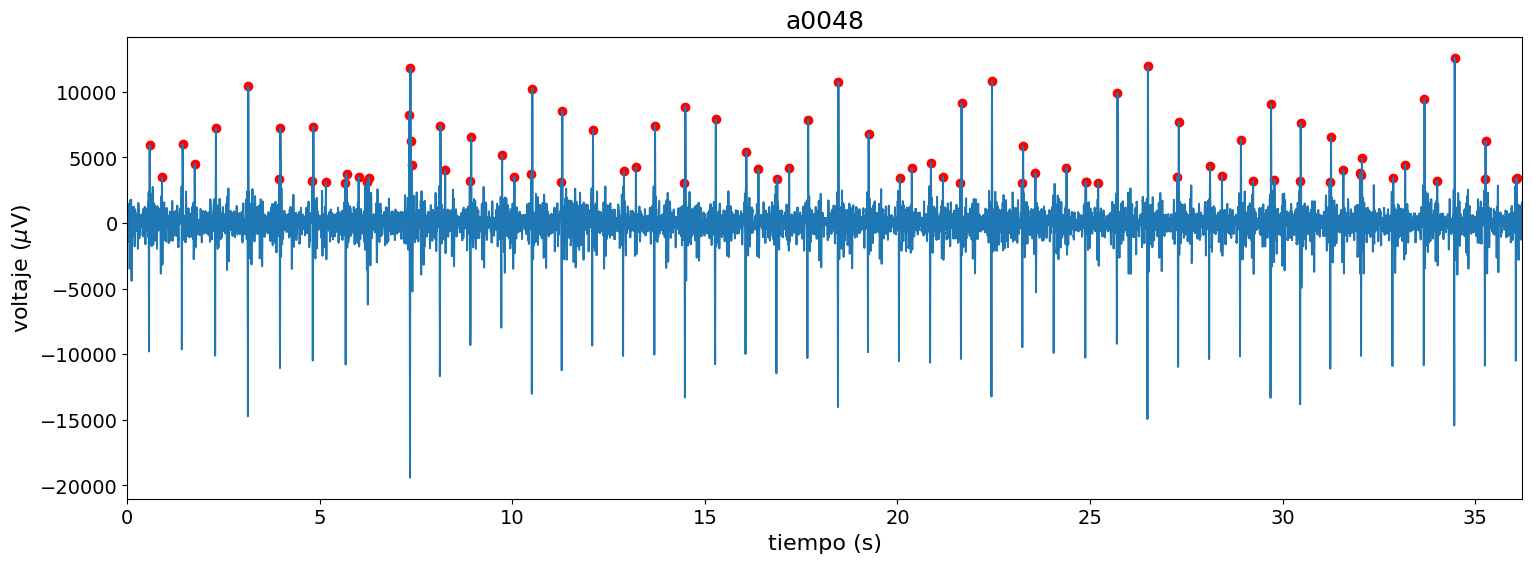

In [ ]:
# Se muestra los maximos o picos R

for i in range(0, len(nice)):
    timeECG, waveData = ecg(nice[i]+'.wav')
    mxs_indices = detecta_maximos_locales(timeECG, waveData)
       #Plotting EMG signal
    plt.figure(figsize=(18,6))
    plt.xlabel(r'tiempo (s)')
    plt.ylabel(r'voltaje ($\mu$V)')
    plt.xlim(min(timeECG),max(timeECG))
    plt.plot(timeECG, waveData)
    plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
    plt.title(nice[i])
    plt.show()


Para que el funcionamiento de la funcion sea el más óptimo se ajustan las gráficas dentro de un valor inical y uno final donde se puede apreciar con mayor claridad los ciclos, además de ajustar la relación de umbral, para que cada una de los picos R sean detectados correctamente. Al realizar estos pasos se puede asegurar una mayor exactitud a la hora de calcular la frecuencia cardiaca


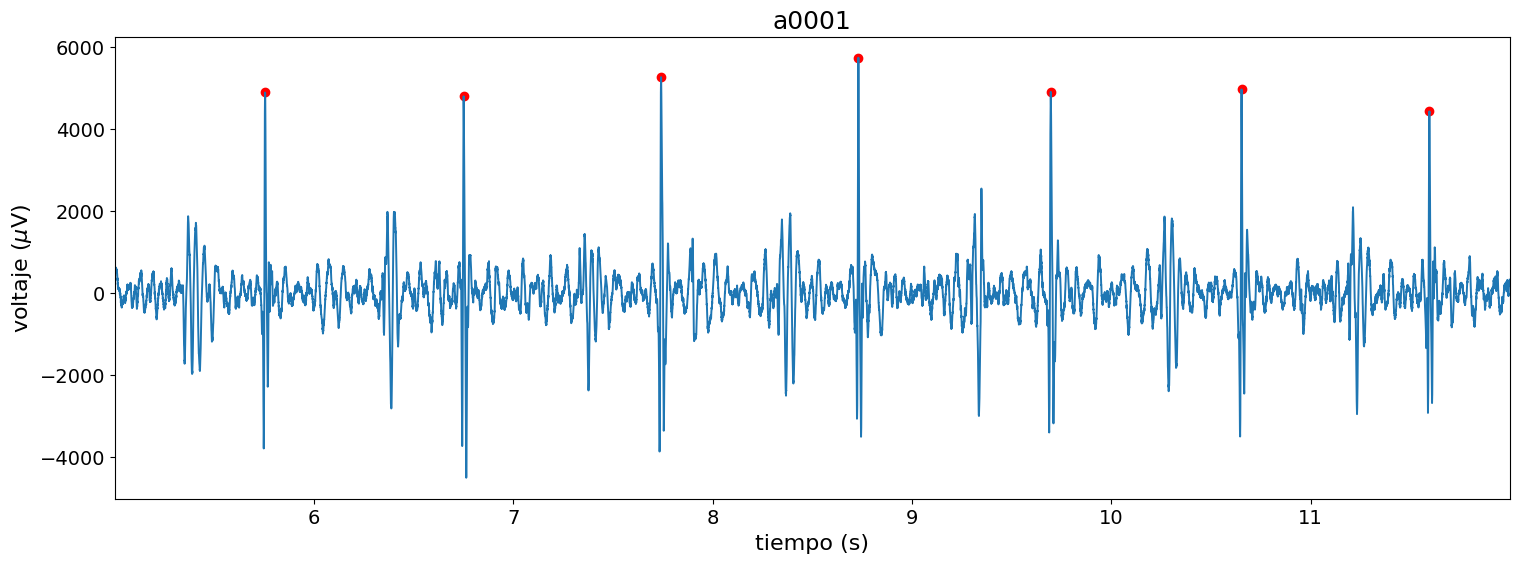

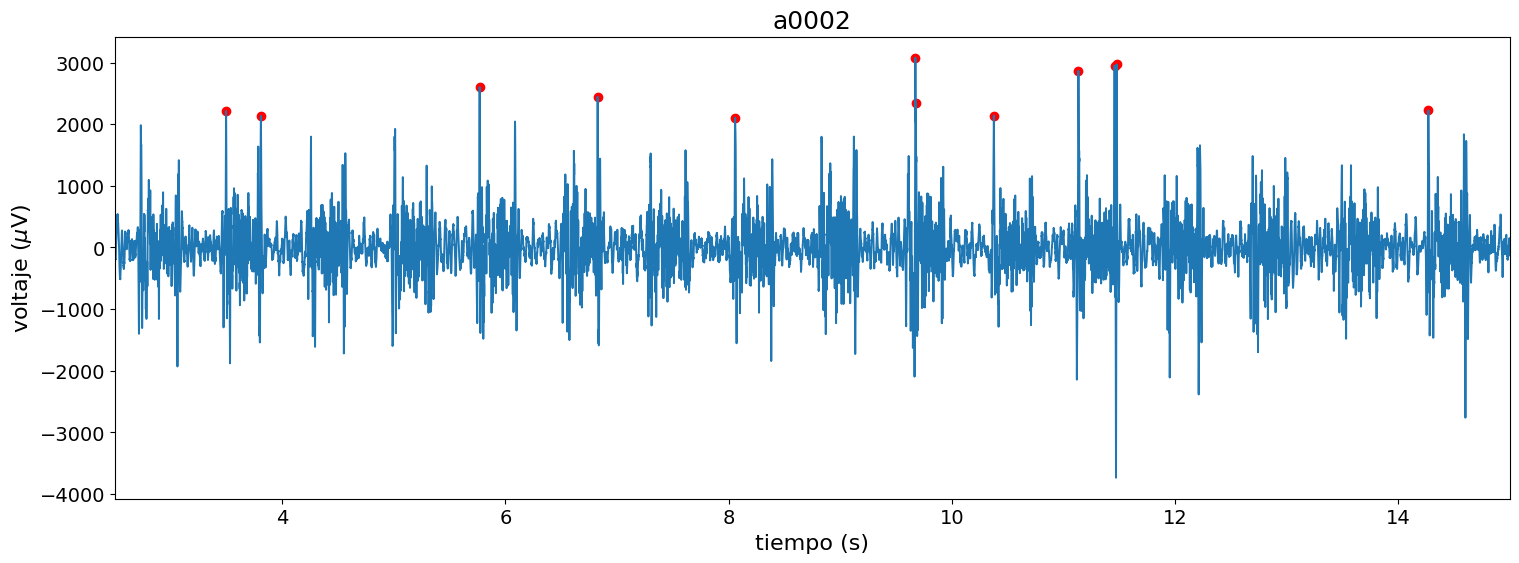

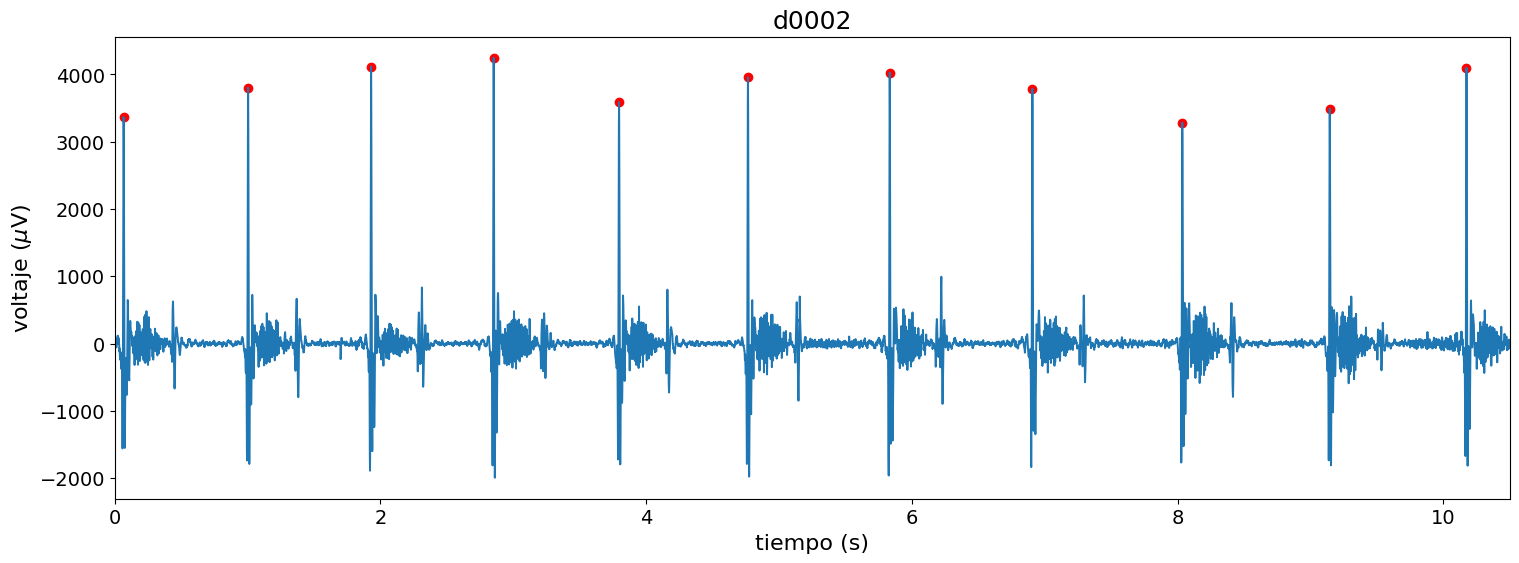

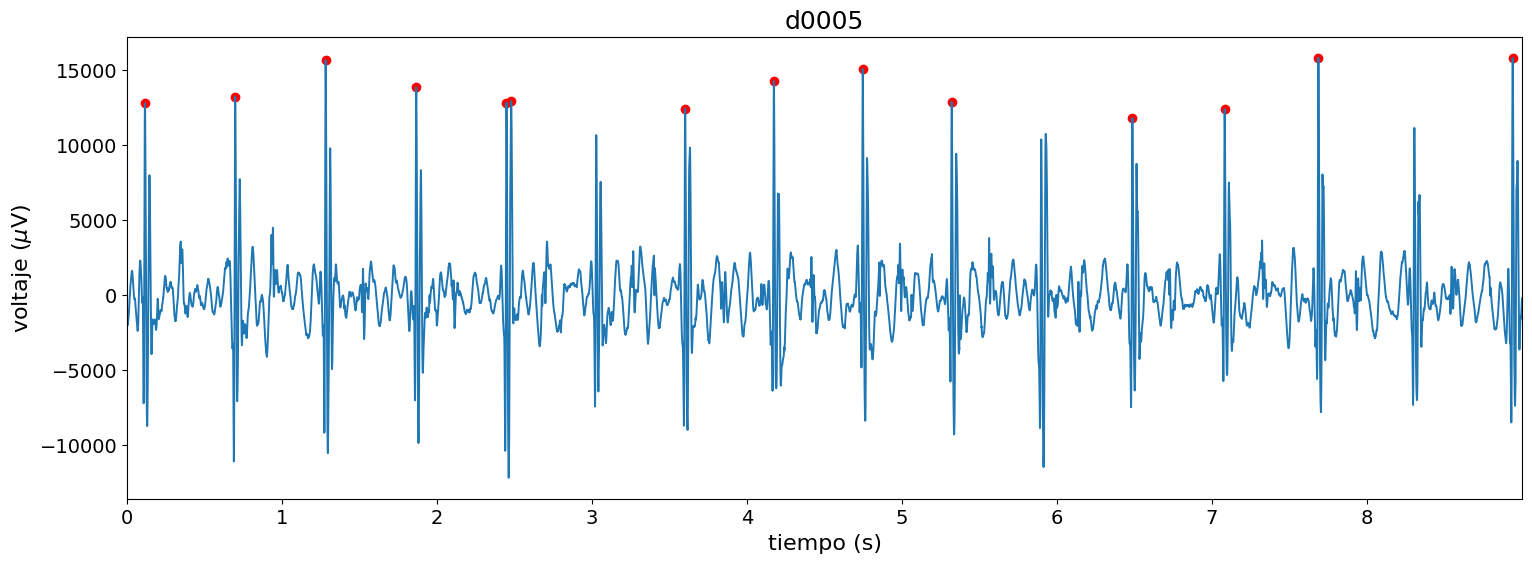

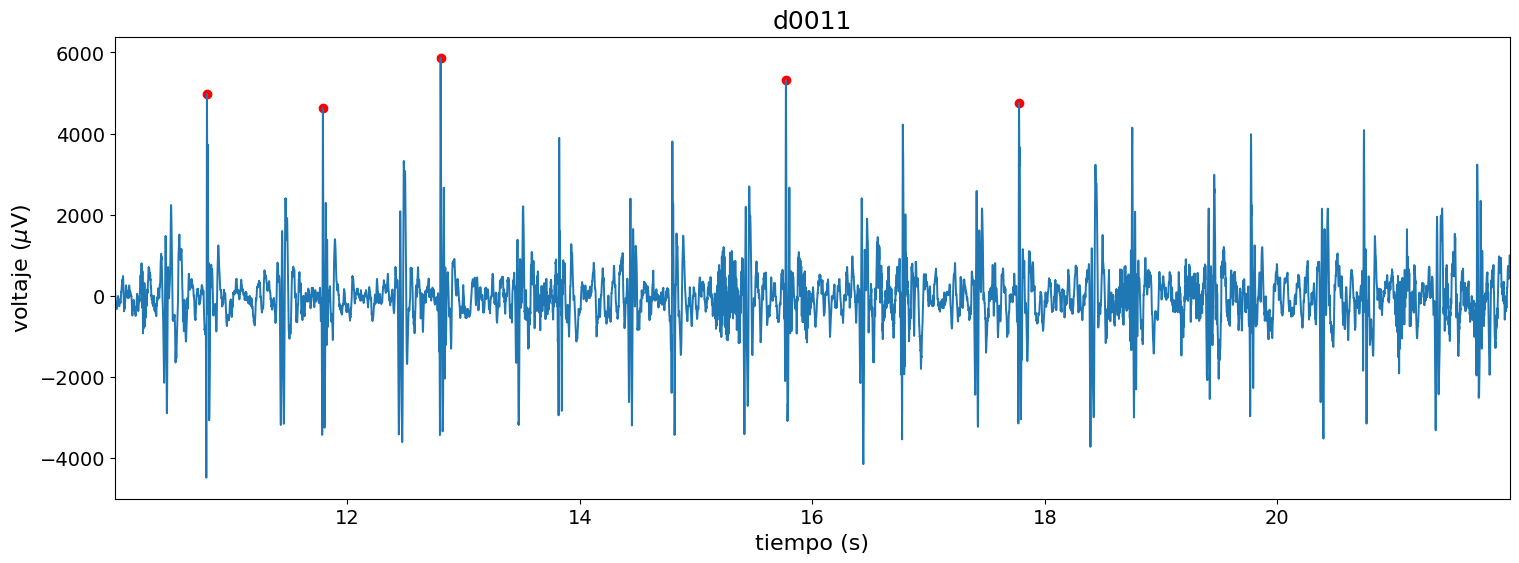

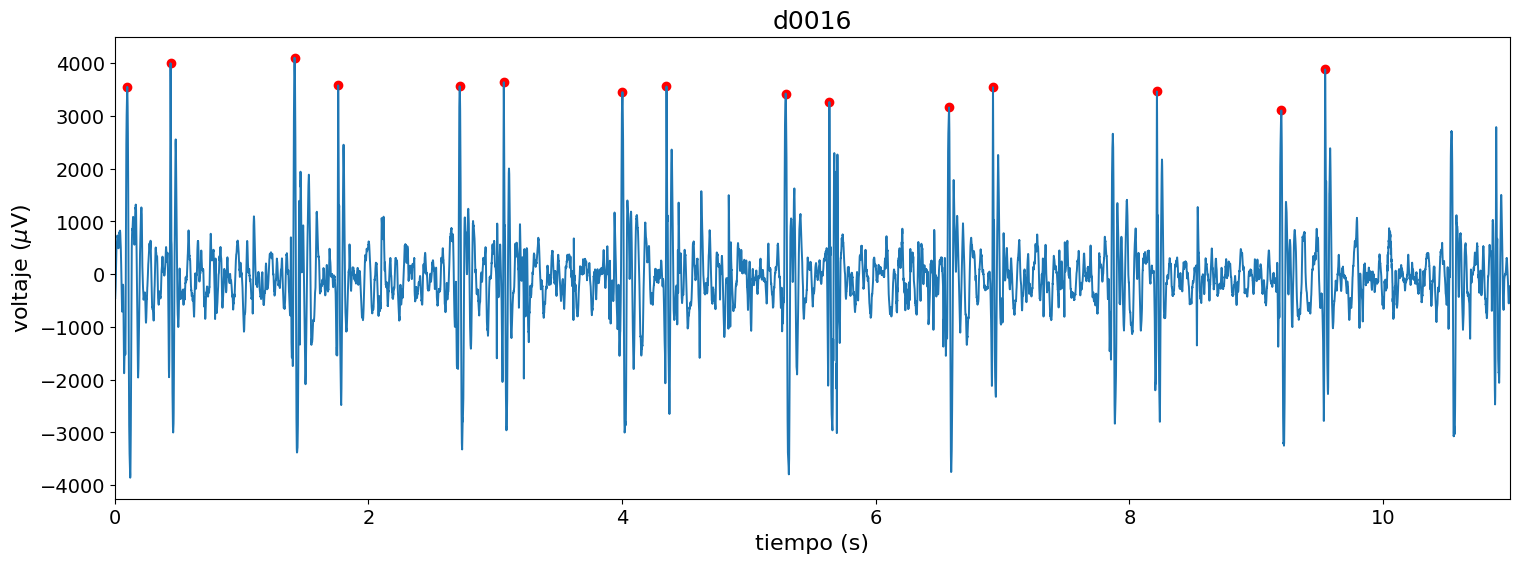

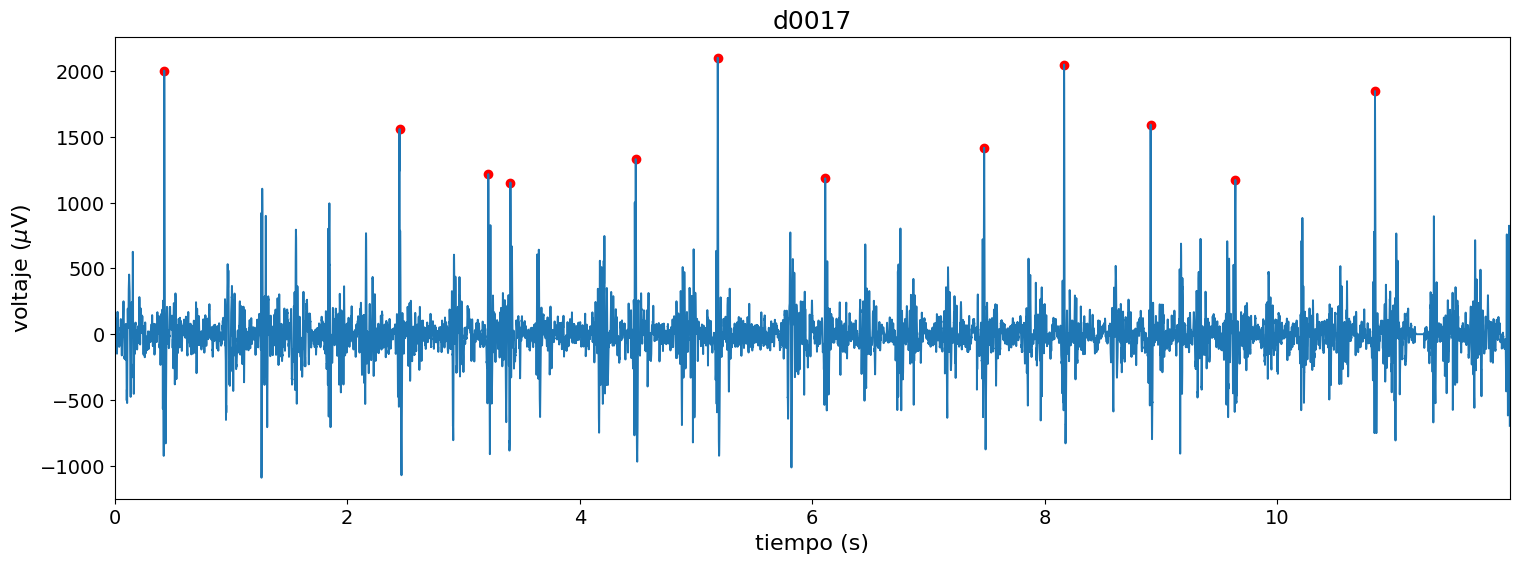

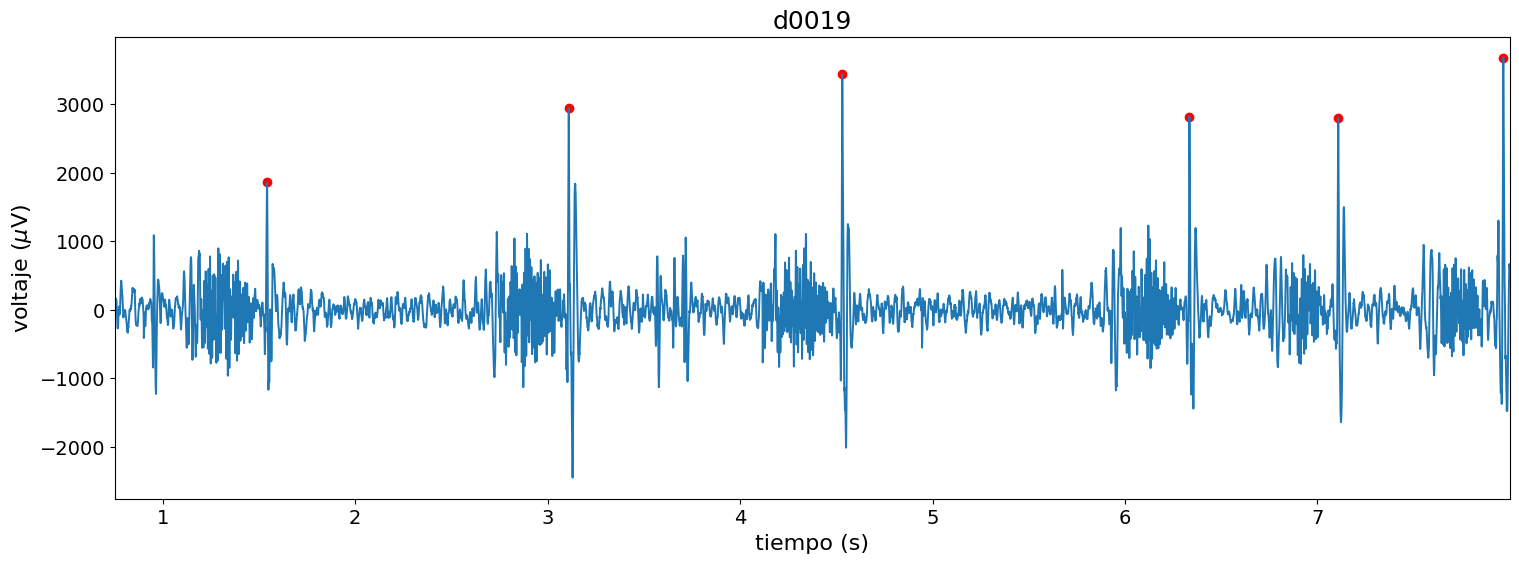

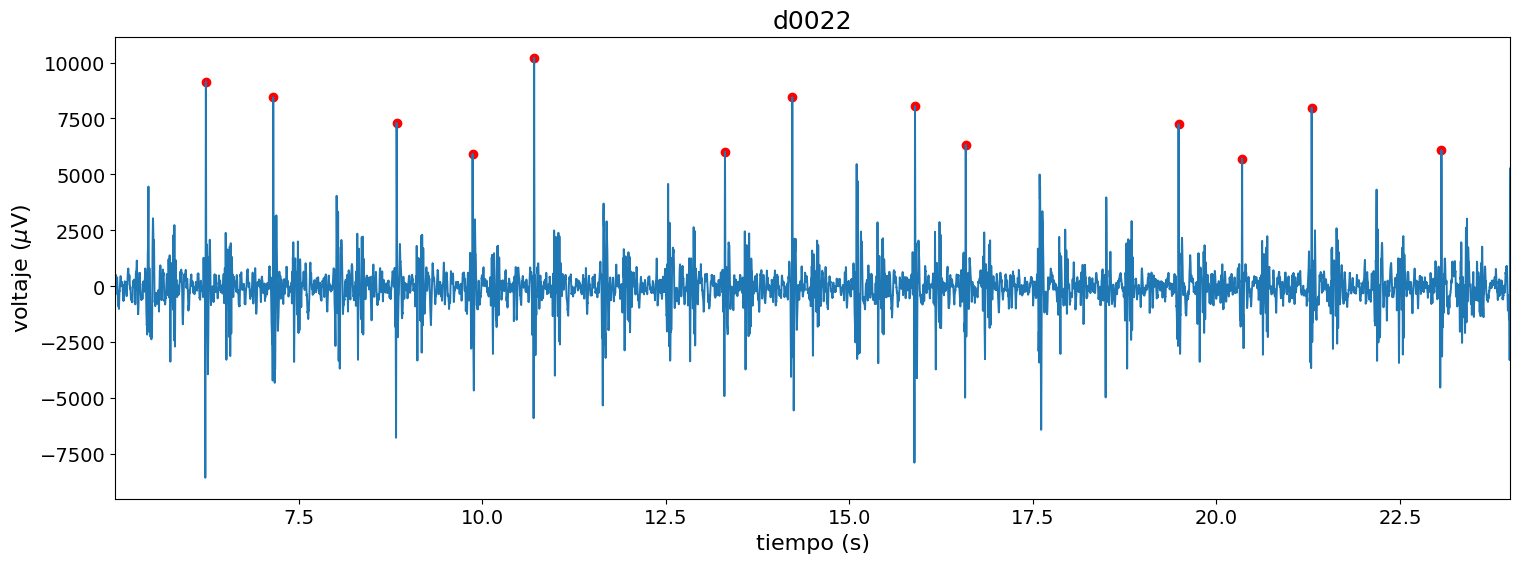

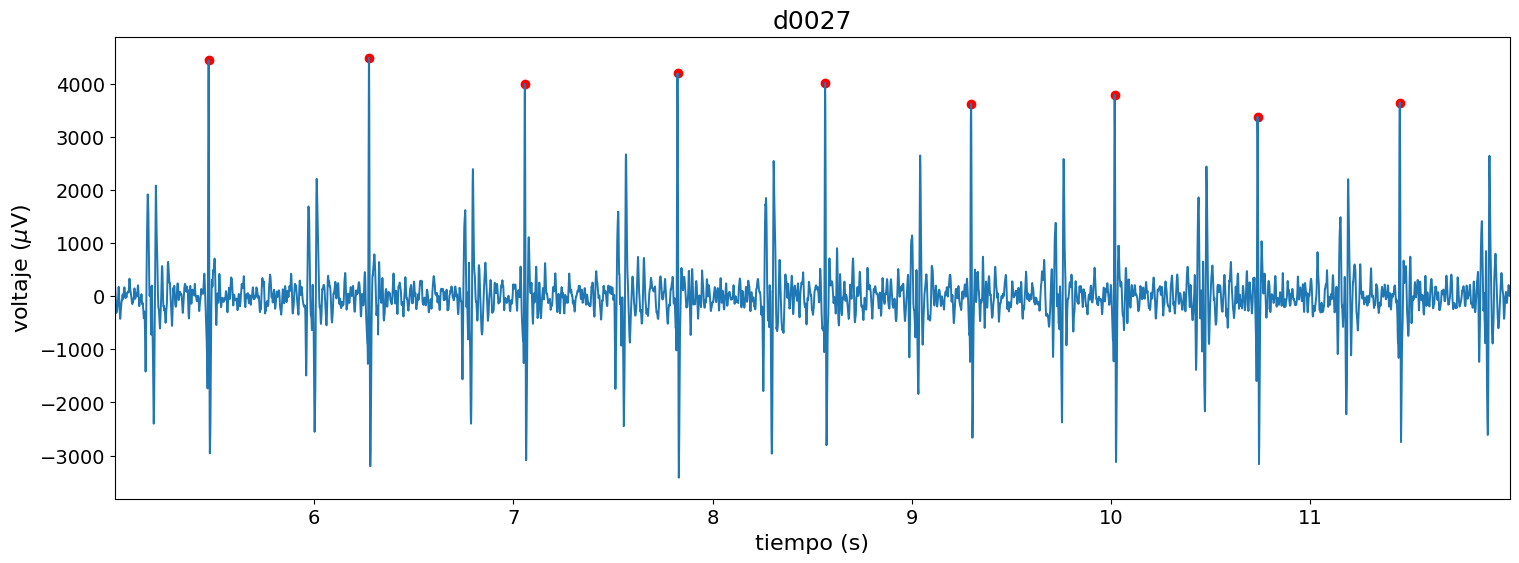

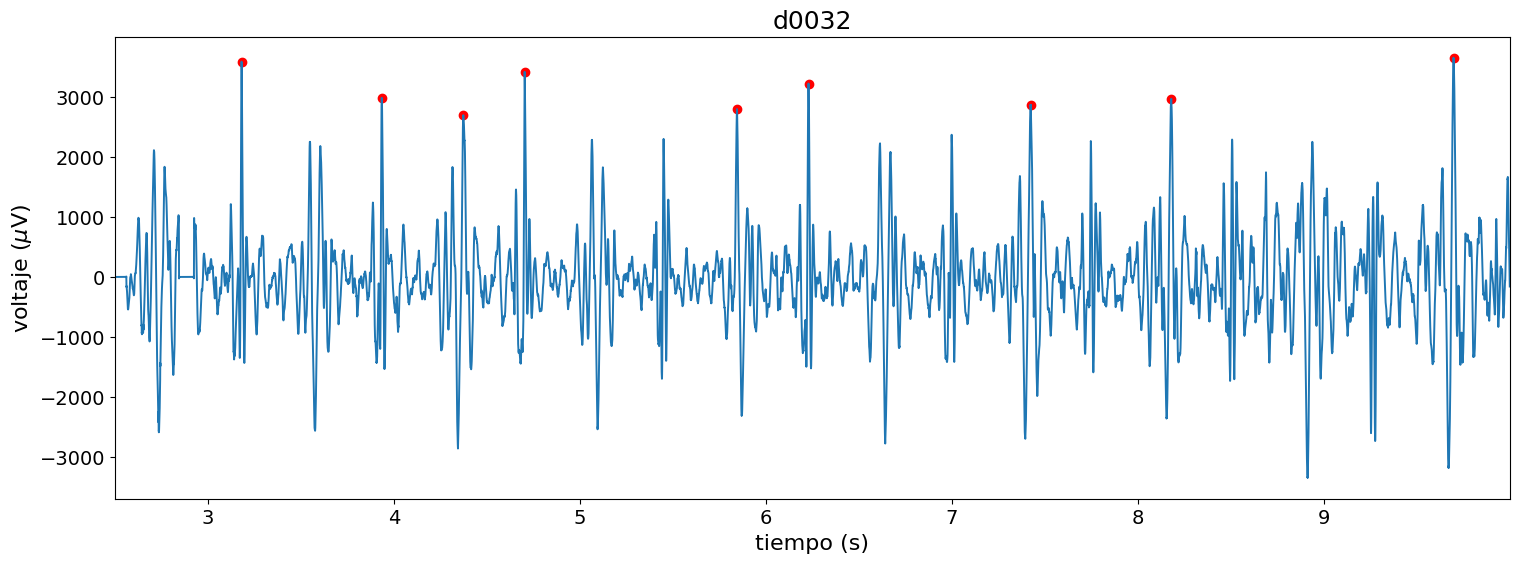

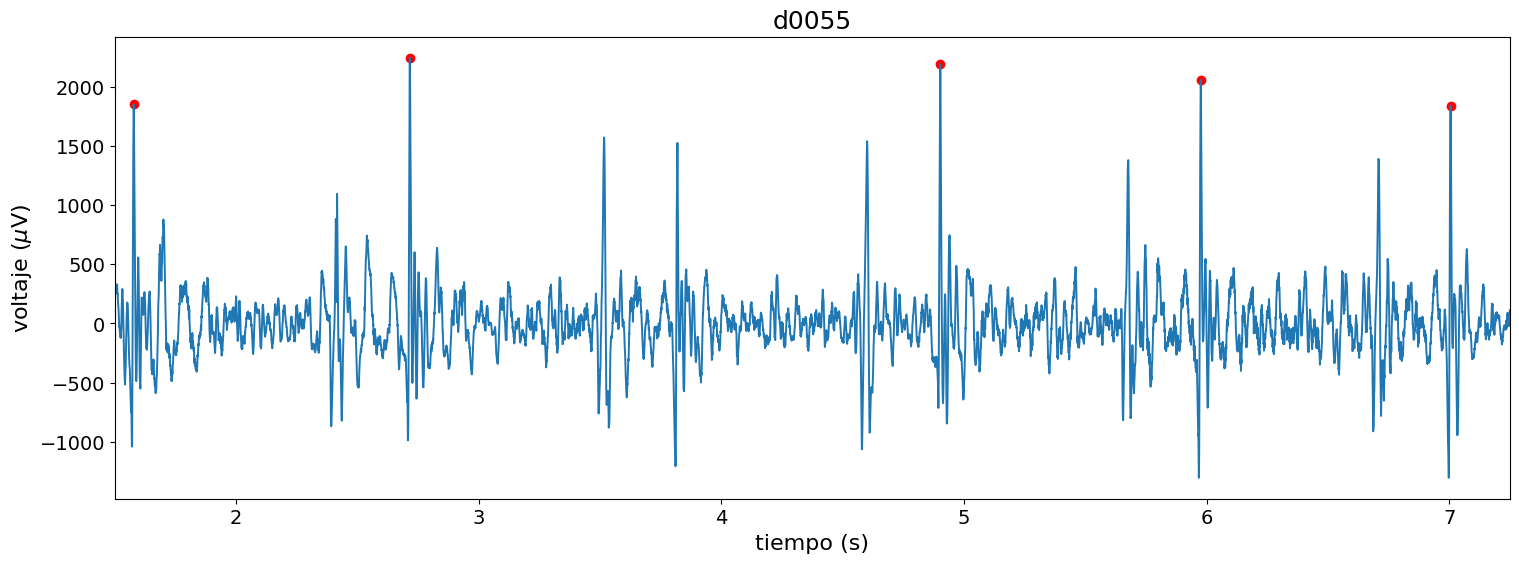

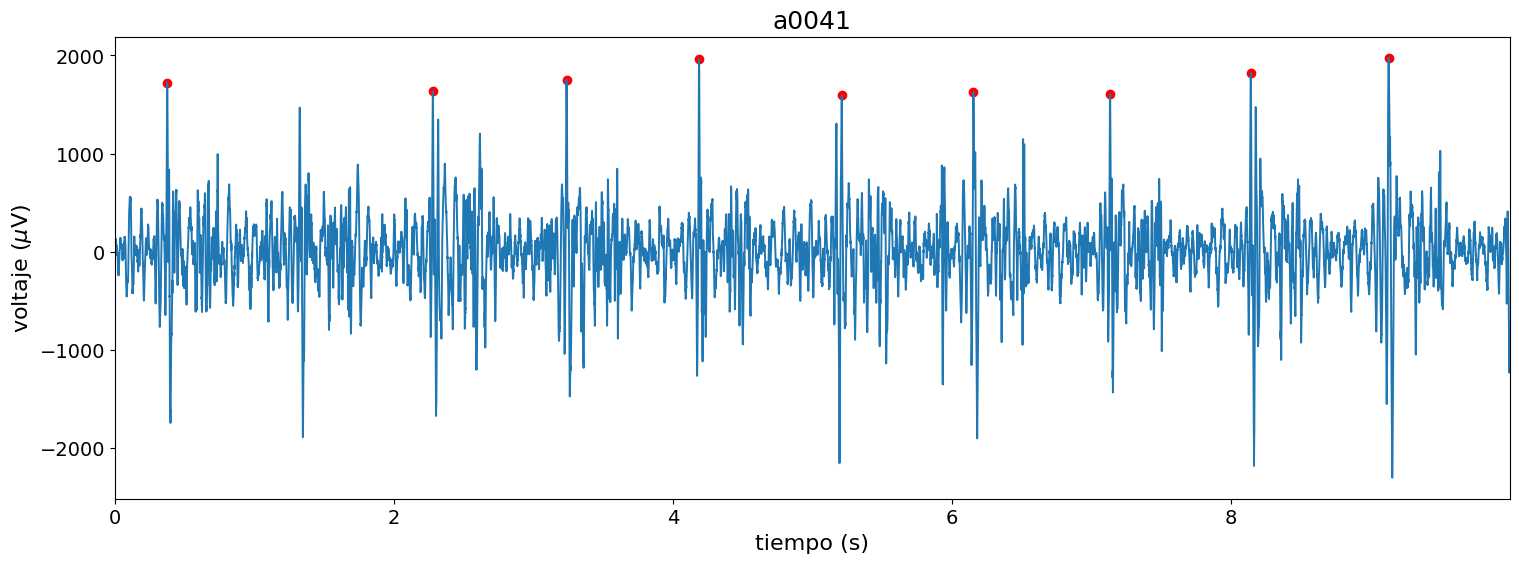

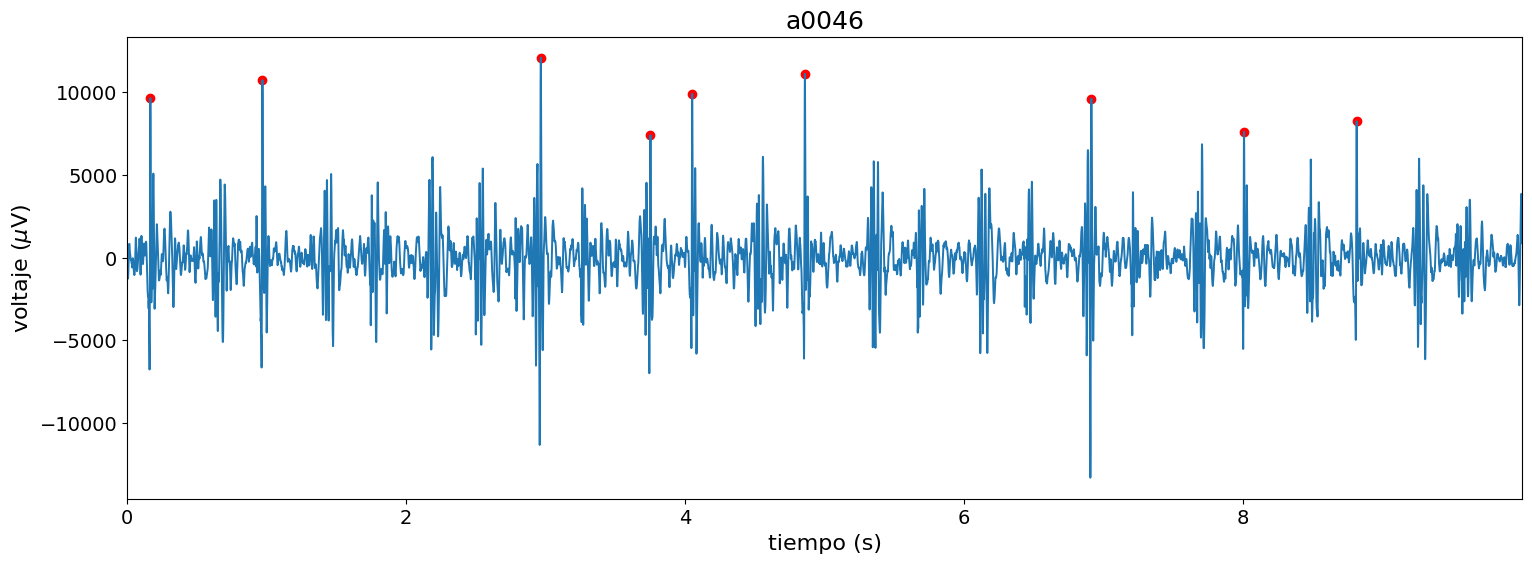

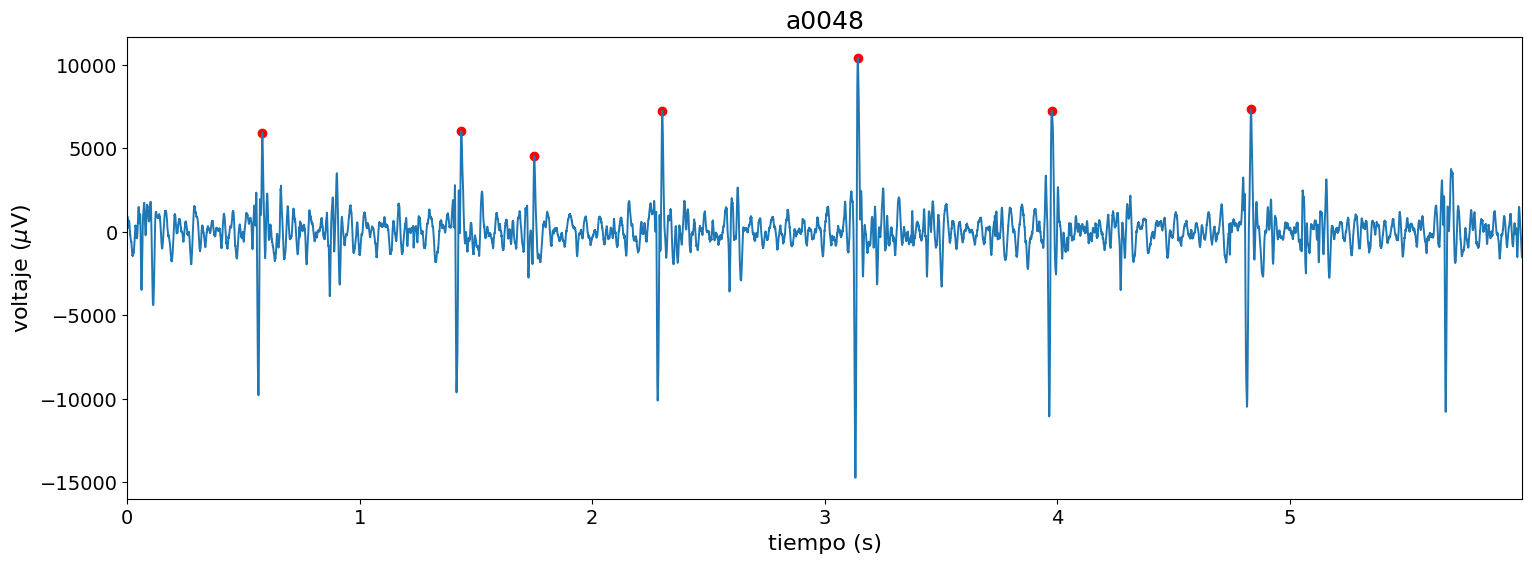

In [ ]:
# Parametros de inicio y final de los ciclos selecionados para ser analizados y su relación de umbral

inicio_muestras = [1.0, 0.5, 0, 0, 2, 0, 0, 0.15, 1, 1, 0.5, 0.3, 0, 0, 0]
final_muestras = [2.4, 3, 2.1, 1.8, 4.4, 2.2, 2.4, 1.6, 4.8, 2.4, 2, 1.45, 2, 2, 1.2]
threshold = [0.70, 0.85, 0.70, 0.85, 0.85, 0.85, 0.70, 0.70, 0.75, 0.85, 0.85, 0.85, 0.90, 0.80, 0.75]


for i in range(0, len(nice)):
    m1 = int(inicio_muestras[i]*10000)
    m2 = int(final_muestras[i]*10000)
    timeECG, waveData = ecg(nice[i]+'.wav')
    timeECG, waveData = timeECG[m1:m2], waveData[m1:m2]
    mxs_indices = detecta_maximos_locales(timeECG, waveData,threshold_ratio=threshold[i])
    plt.figure(figsize=(18,6))
    plt.xlabel(r'tiempo (s)')
    plt.ylabel(r'voltaje ($\mu$V)')
    plt.xlim(min(timeECG),max(timeECG))
    plt.plot(timeECG, waveData)
    plt.title(nice[i])
    plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
    plt.show()



Se calcula el promedio de latidos por minuto de cada señal, el cual es calculado en función de los índices de los máximos locales y el tiempo total de la señal de ECG recortada.Tambien se calcula las frecuencias cardíacas instantáneas entre los máximos locales detectados para cada latido. Esto se hace calculando la inversa del intervalo de tiempo entre los máximos consecutivos.

Con estos datos se procede a realizar los siguiemtes graficas, las cuales muestran la frecuencia cardíaca media como una línea roja, las frecuencias cardíacas instantáneas como puntos rojos y una sombra roja que representa la desviación estándar.



Latidos por minuto: 60.00344482312699


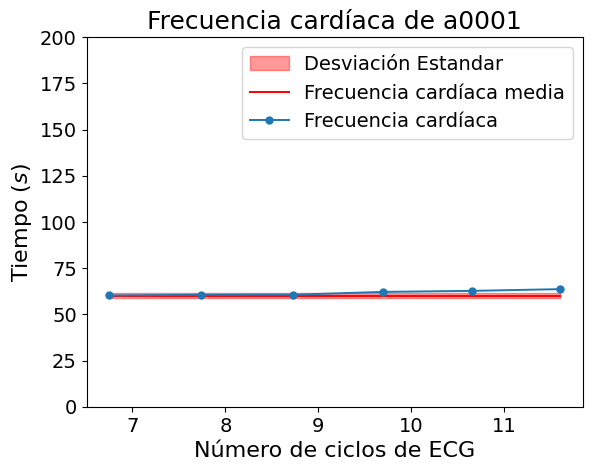

Latidos por minuto: 57.60092131606142


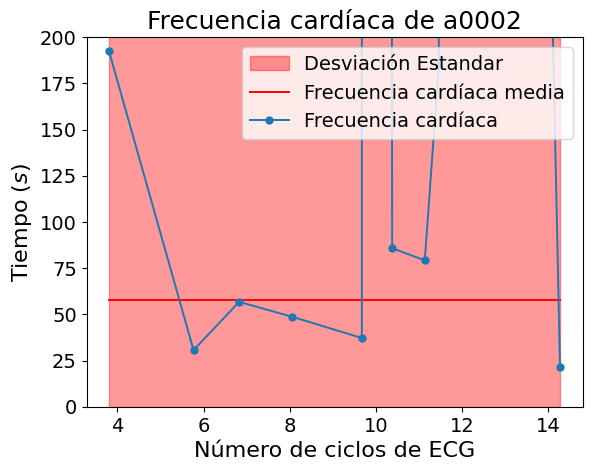

Latidos por minuto: 62.857238481745


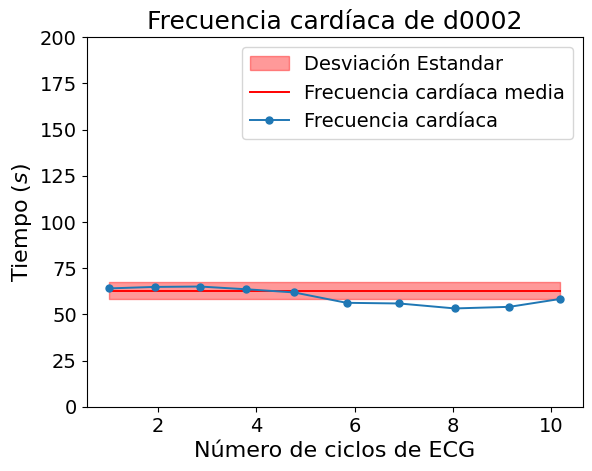

Latidos por minuto: 93.33356321760083


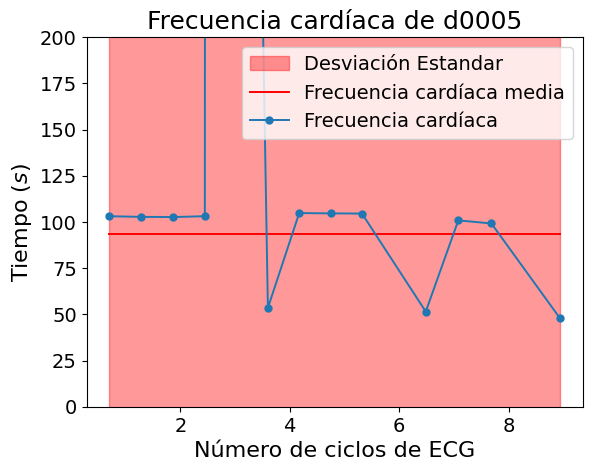

Latidos por minuto: 25.000499858278662


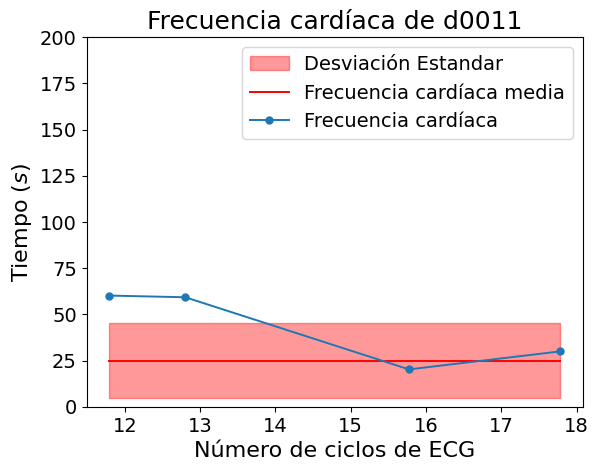

Latidos por minuto: 81.81819780921352


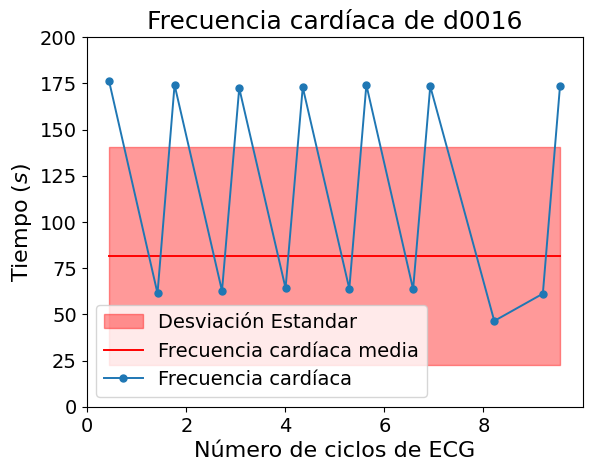

Latidos por minuto: 60.00006671540856


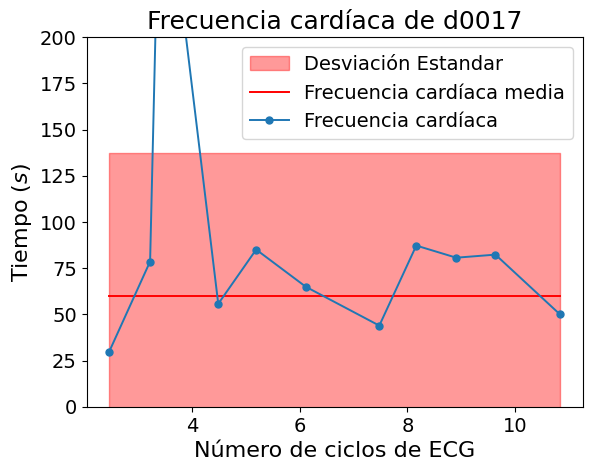

Latidos por minuto: 49.65561213638683


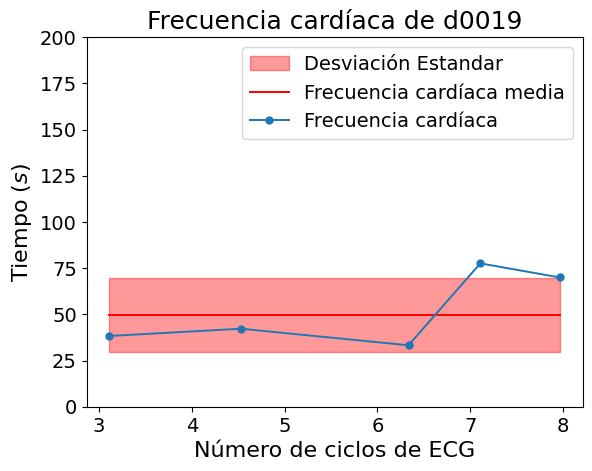

Latidos por minuto: 41.05286090927504


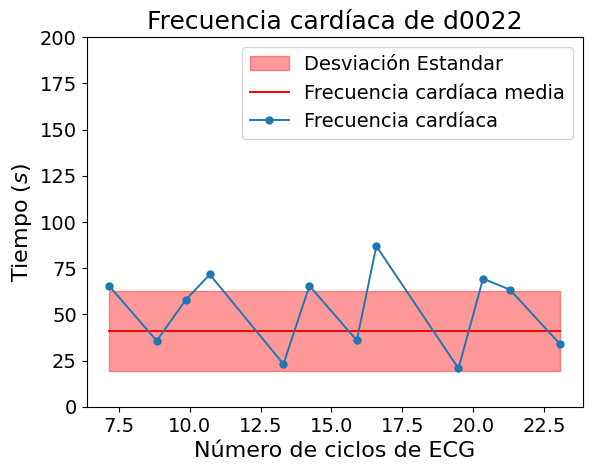

Latidos por minuto: 77.14516921784391


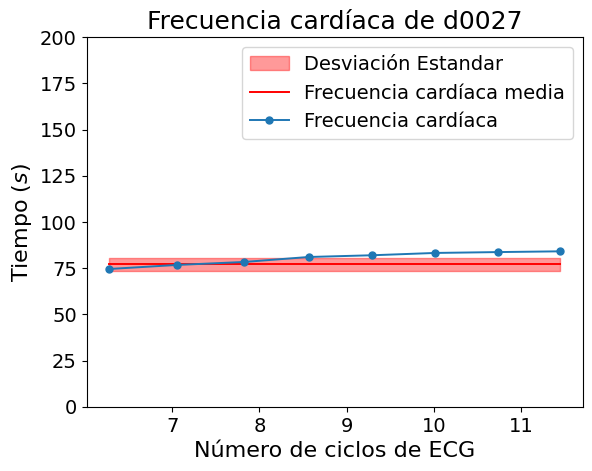

Latidos por minuto: 72.00253173778064


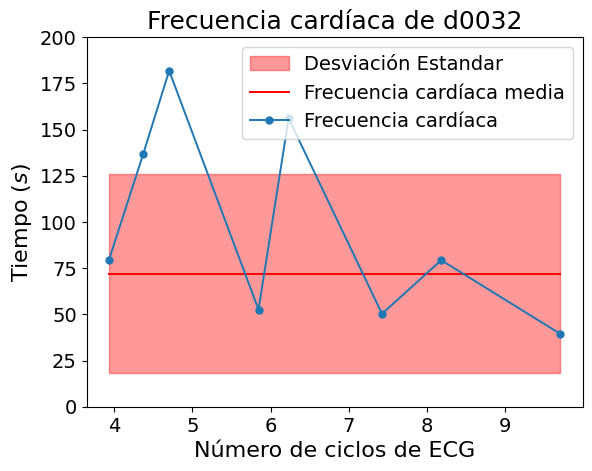

Latidos por minuto: 52.176250533993205


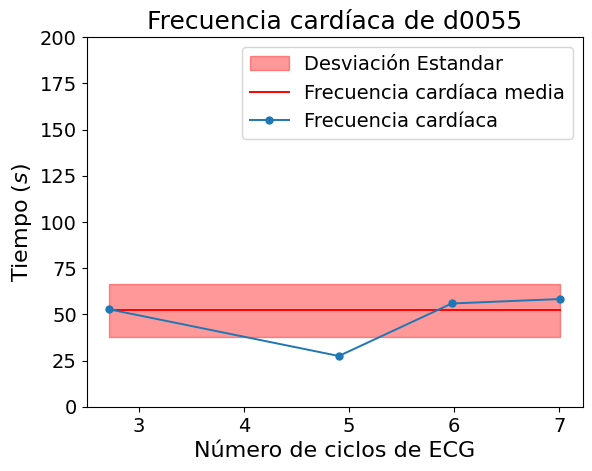

Latidos por minuto: 54.00193106297201


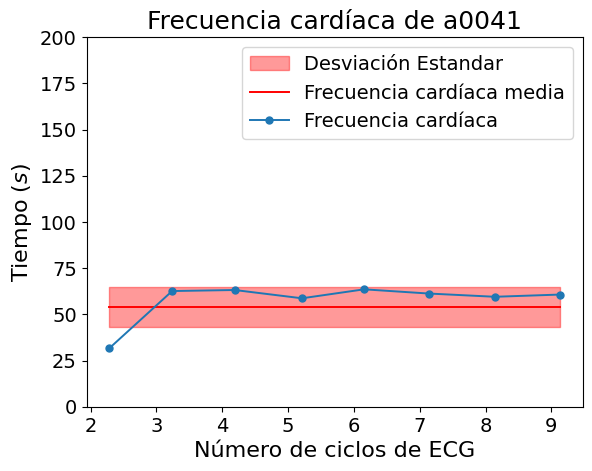

Latidos por minuto: 54.00194455659655


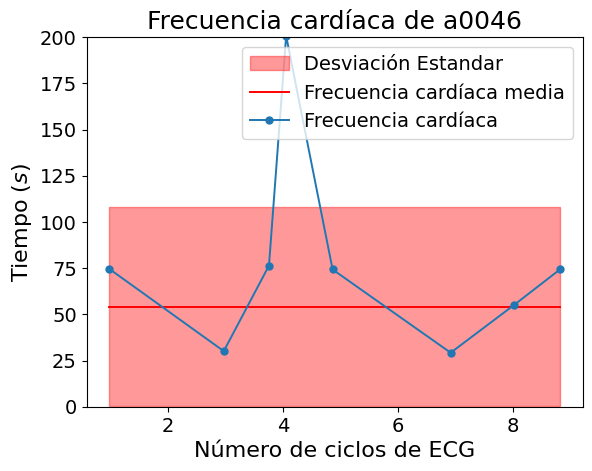

Latidos por minuto: 70.00486751537548


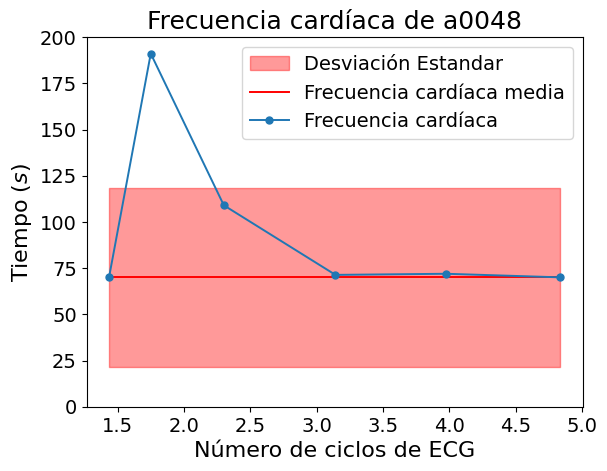

In [ ]:
for i in range(0, len(nice)):
    m1 = int(inicio_muestras[i]*10000)
    m2 = int(final_muestras[i]*10000)
    timeECG, waveData = ecg(nice[i]+'.wav')
    timeECG, waveData = timeECG[m1:m2], waveData[m1:m2]
    mxs_indices = detecta_maximos_locales(timeECG, waveData,threshold_ratio=threshold[i])
    mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
    print("Latidos por minuto:", mean_bpm)

    heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
    time = timeECG[mxs_indices]

    mean_vec = [mean_bpm for i in range(0, len(time)-1)]
    std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
    std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]
    plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Desviación Estandar", color='red', alpha=0.4)
    plt.plot(time[1:], mean_vec, c="r", label = "Frecuencia cardíaca media")
    plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Frecuencia cardíaca")
    plt.ylim((0, 200))
    plt.title("Frecuencia cardíaca de " + nice[i])
    plt.xlabel(r'Número de ciclos de ECG')
    plt.ylabel(r'Tiempo ($s$)')
    plt.legend()
    plt.show()


# Resultados



Por medio de la realización de este proyecto, en el momento de obtener las señales sonoras de
latidos de corazón, para así poder graficar por medio del código de Python las ondas seleccionadas,
las cuales posteriormente se puede realizar un análisis para la obtención de los picos R para así poder estimar la frecuencia cardiaca se concluyó que los resultados obtenidos por medio del método utilizado  llegan a tener una exact
itud requerido para obtener un diagnóstico correcto sobre la frecuencia cardiaca si la señal no presenta mucho ruido y presenta las condiciones anteriormente mencionadas para que su funcionamiento sea el más óptimo.


# Referencias
[1] Erin C. McKiernan Ana Daniela del Río Pulido. “Graphing and analyzing ECG data”. En:
https://gist.github.com/emckiernan/3e7e86a48256777e9e6a44ede032d938 (2020).

[]Chengyu Liu et al. “An open access database for the evaluation of heart sound algorithms”. En:
Physiological Measurement 37.12 (nov. de 2016), pág. 2181. doi: 10.1088/0967-3334/37/12/2181. url: https://dx.doi.org/10.1088/0967-3334/37/12/2181.
